# Image fitting

After implementing all requested source code, you will fit an MLP and a SIREN to the same image.

These models train fairly fast on a CPU (~2 minutes on a M1 MacBook Pro), but feel free to train on a GPU or Colab for faster prototyping!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch

from problem_1_train import train
from utils import ImageDataset

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Experiment 1: MLPs vs SIRENs

First, fit the MLP.

Step 0 : loss=0.3354, psnr=4.7444


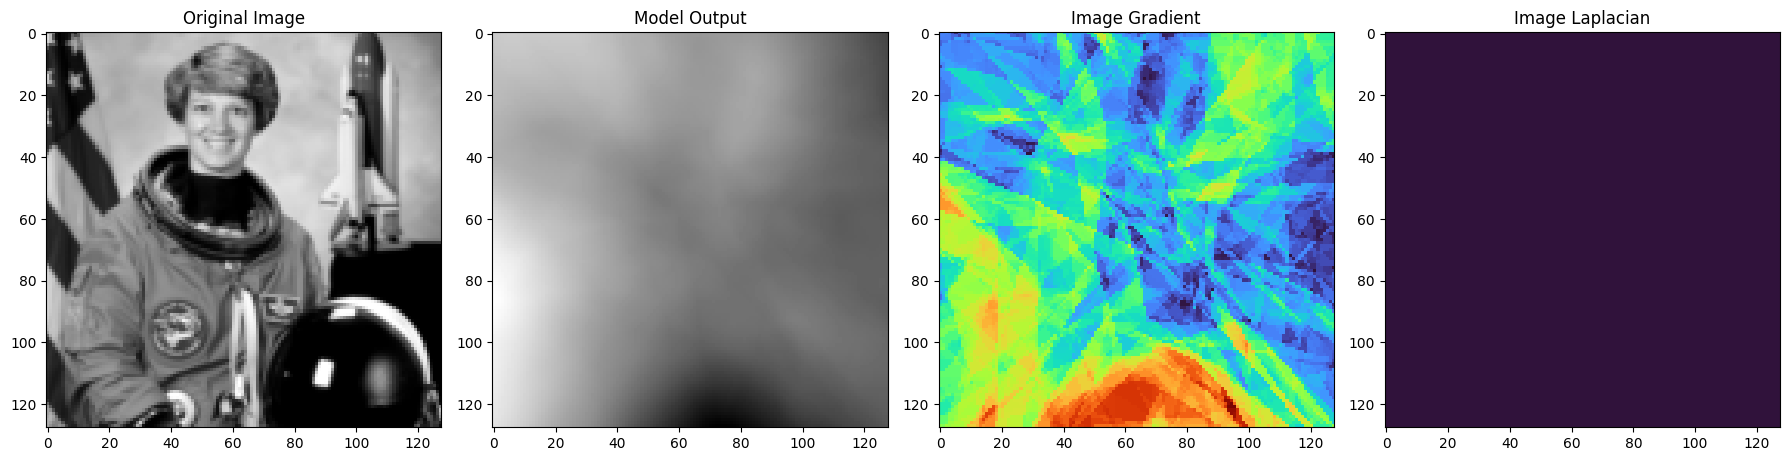

Step 100 : loss=0.2300, psnr=6.3819


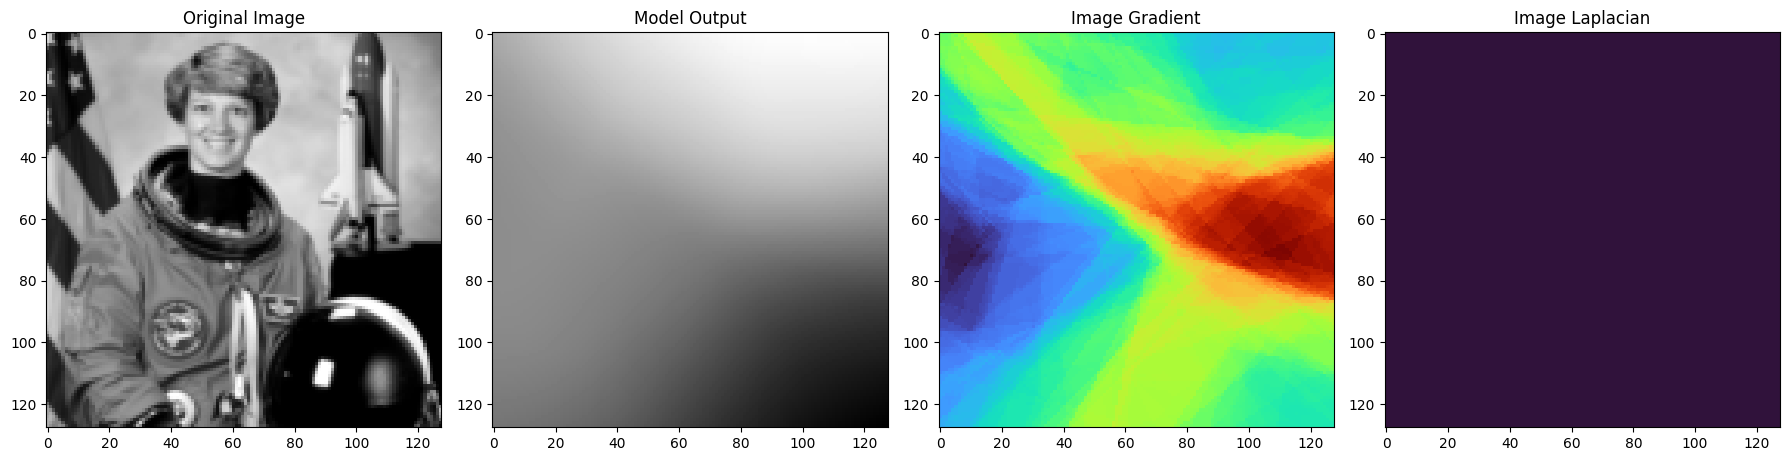

Step 200 : loss=0.2138, psnr=6.6996


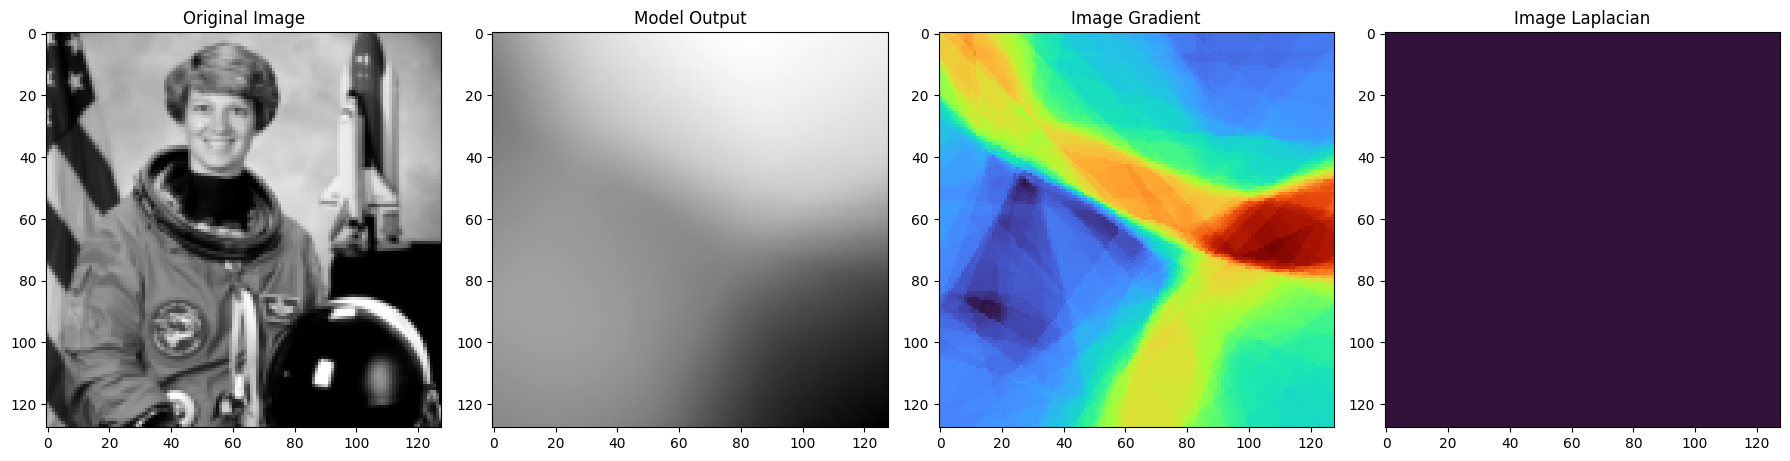

Step 300 : loss=0.2029, psnr=6.9280


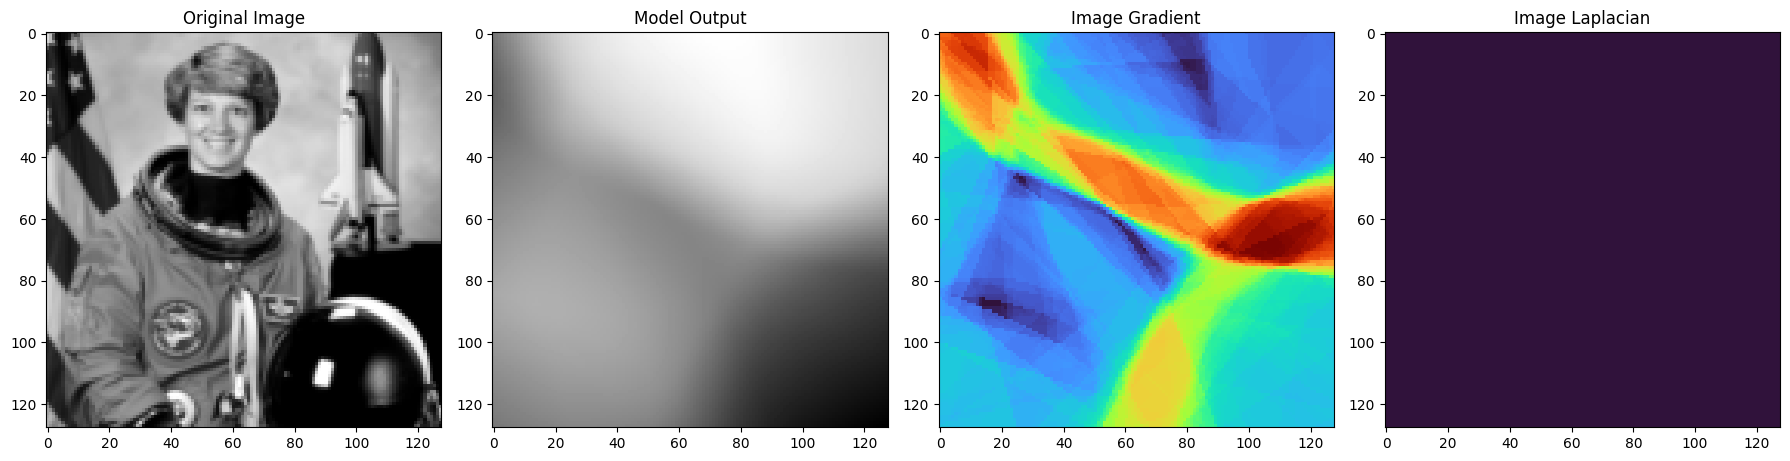

Step 400 : loss=0.1908, psnr=7.1941


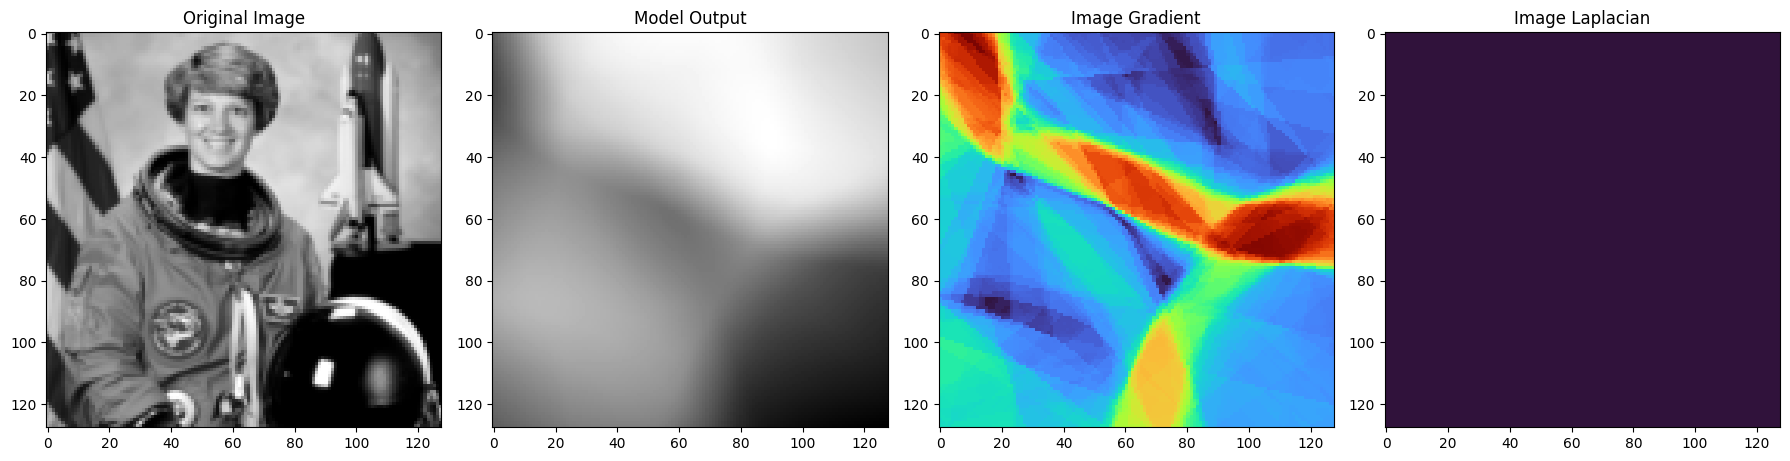

Step 500 : loss=0.1754, psnr=7.5594


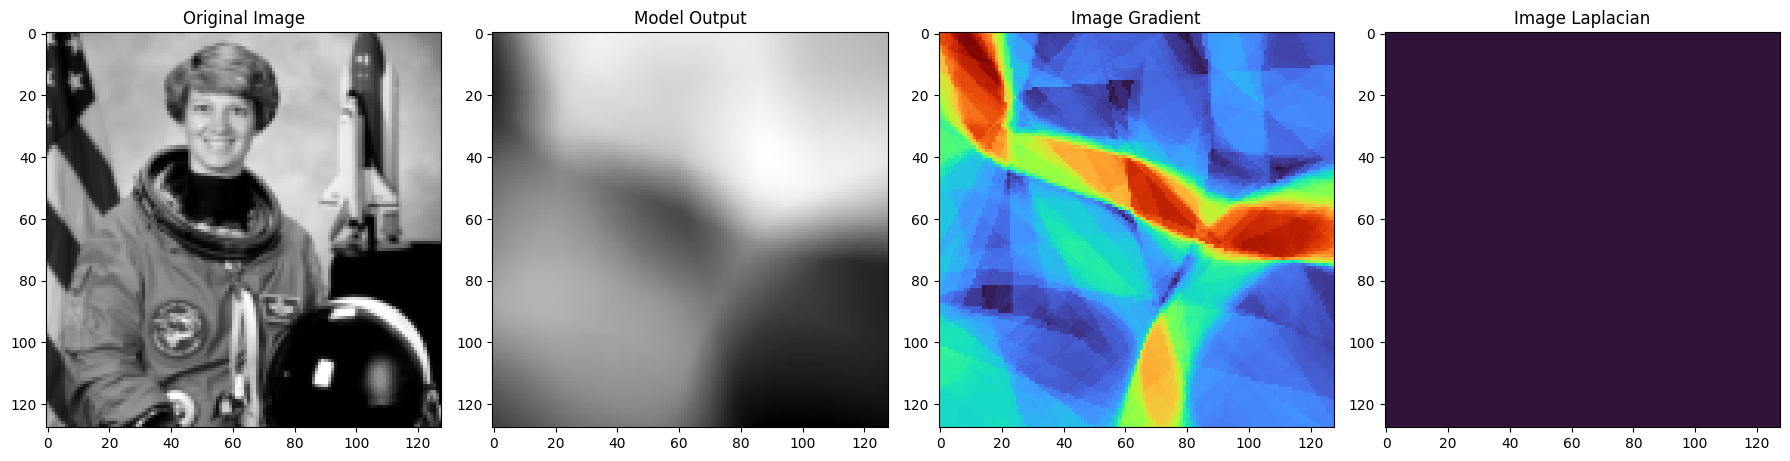

Step 600 : loss=0.1591, psnr=7.9828


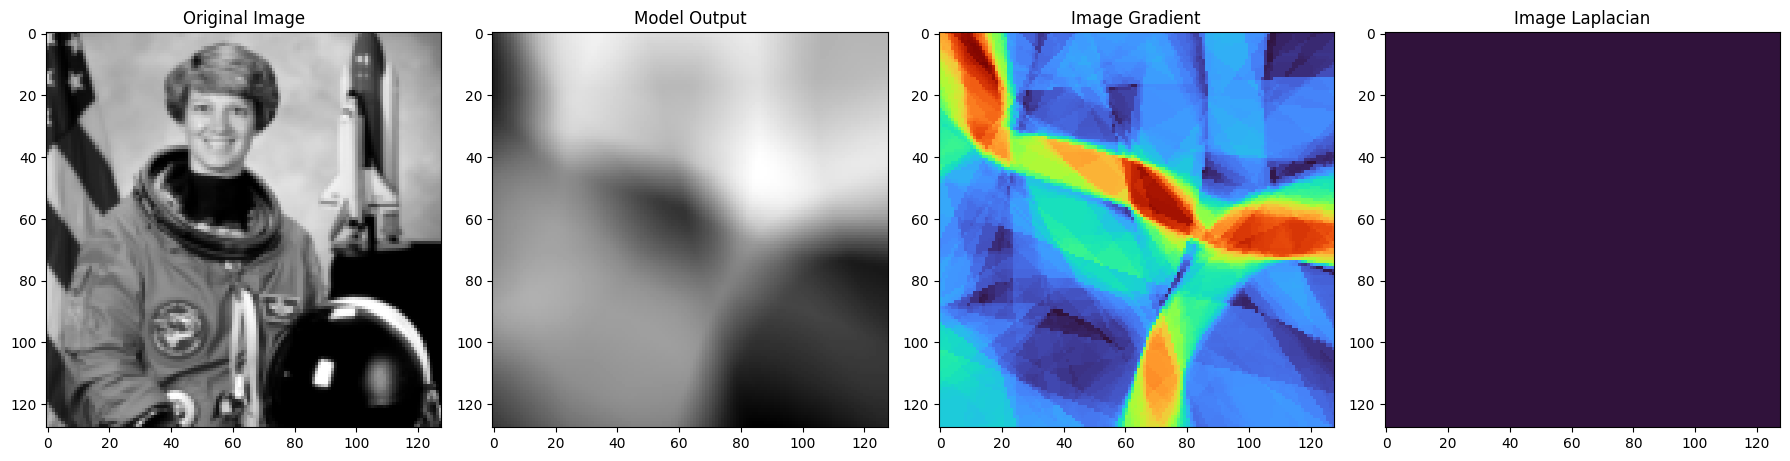

Step 700 : loss=0.1448, psnr=8.3932


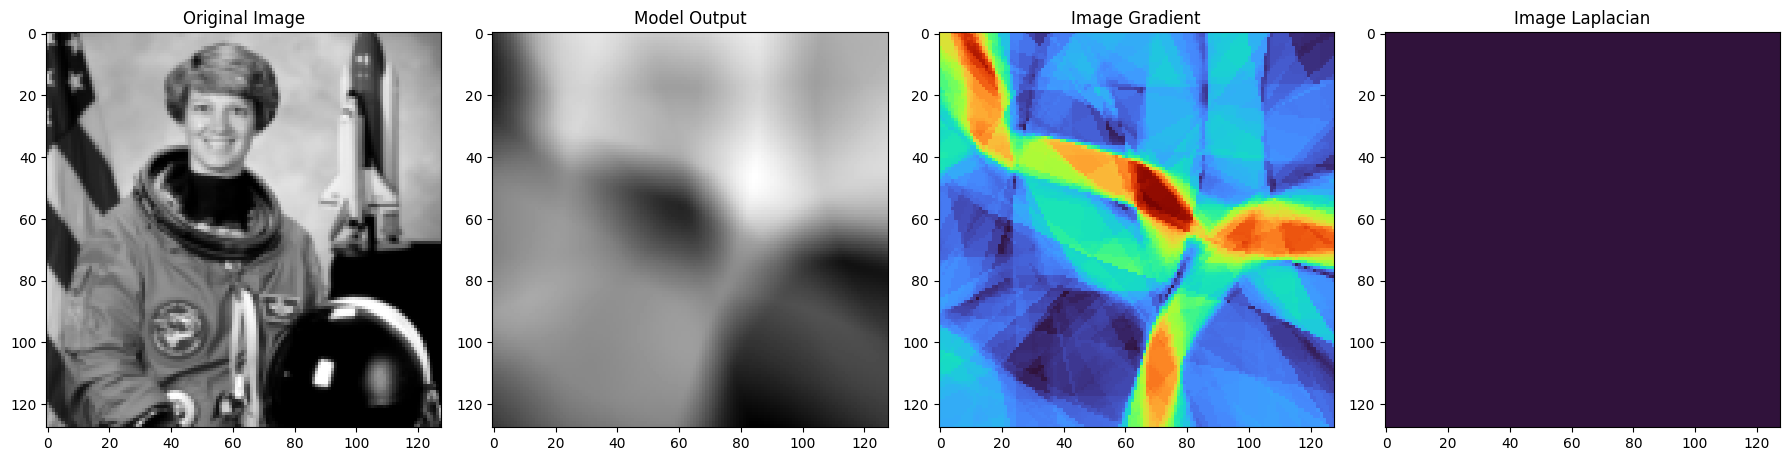

Step 800 : loss=0.1338, psnr=8.7358


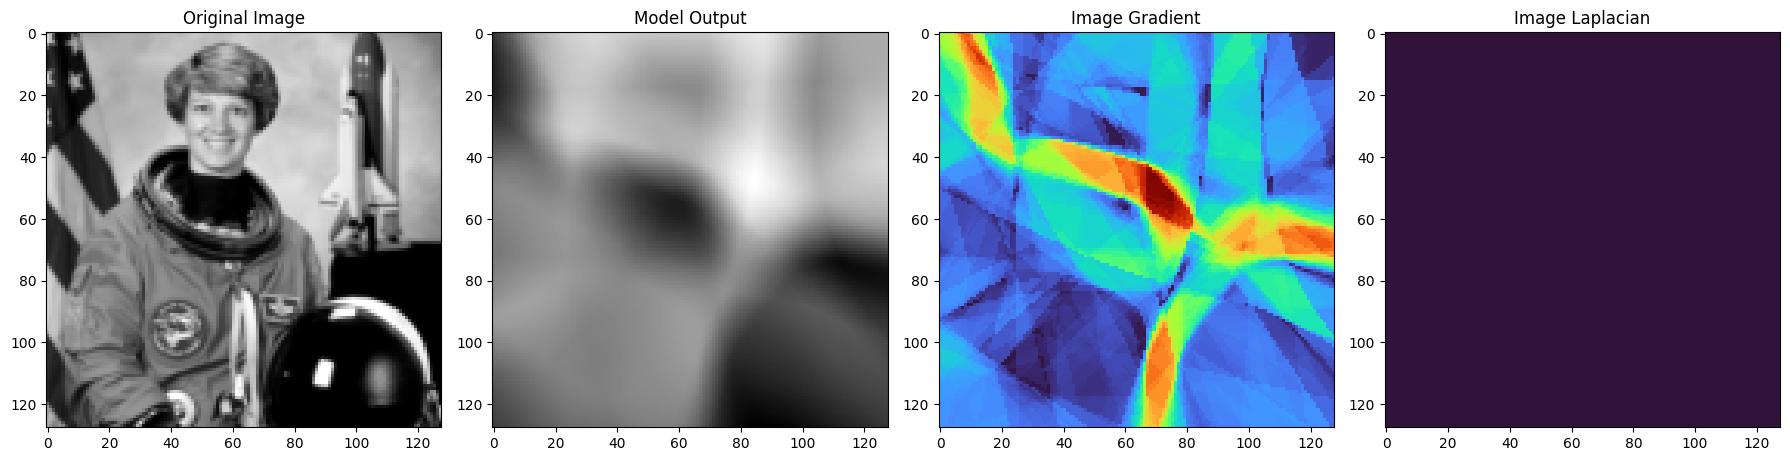

Step 900 : loss=0.1254, psnr=9.0165


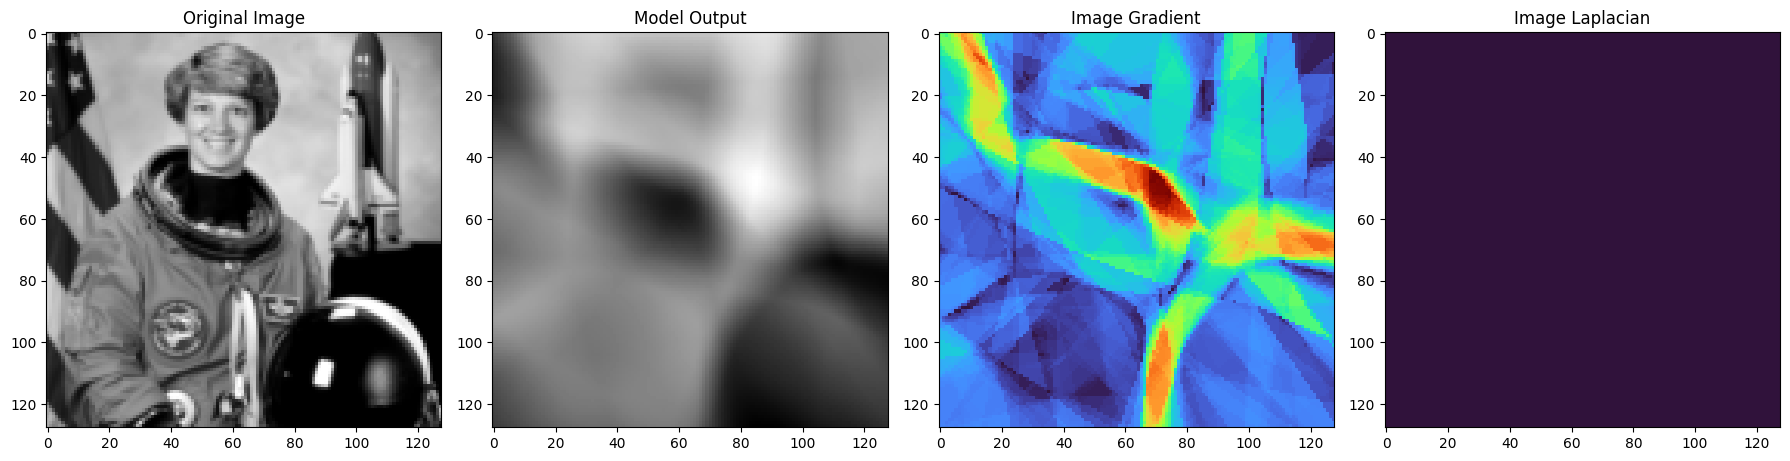

Step 1000 : loss=0.1184, psnr=9.2673


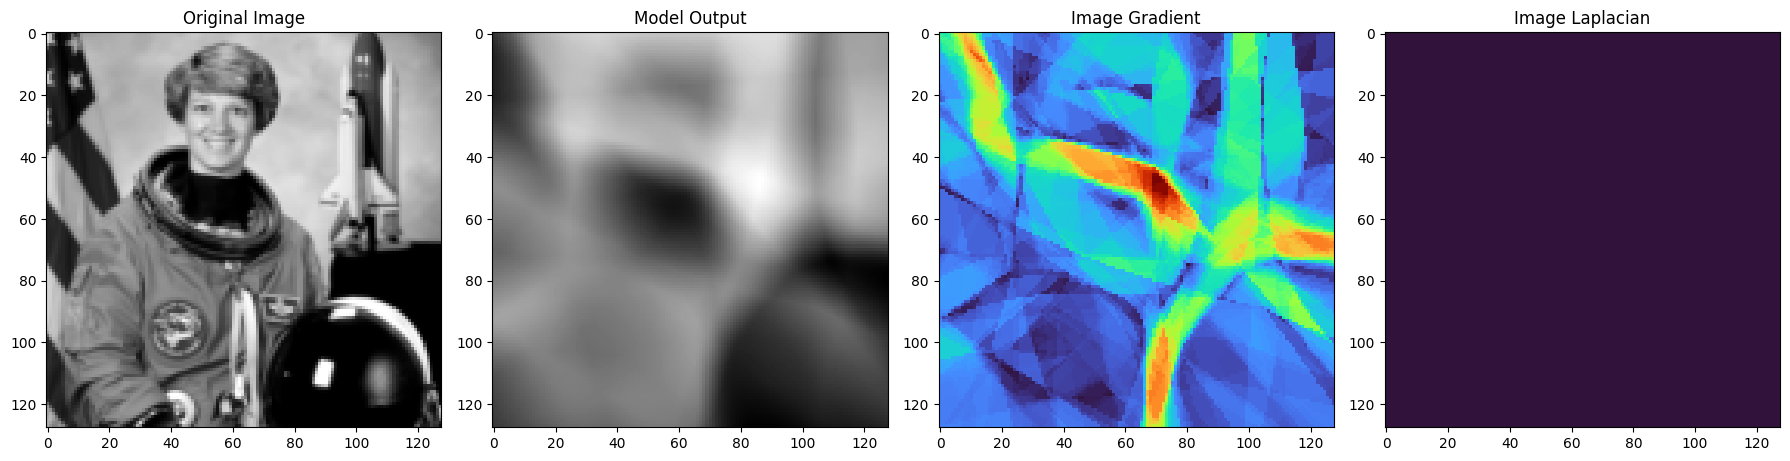

Step 1100 : loss=0.1124, psnr=9.4922


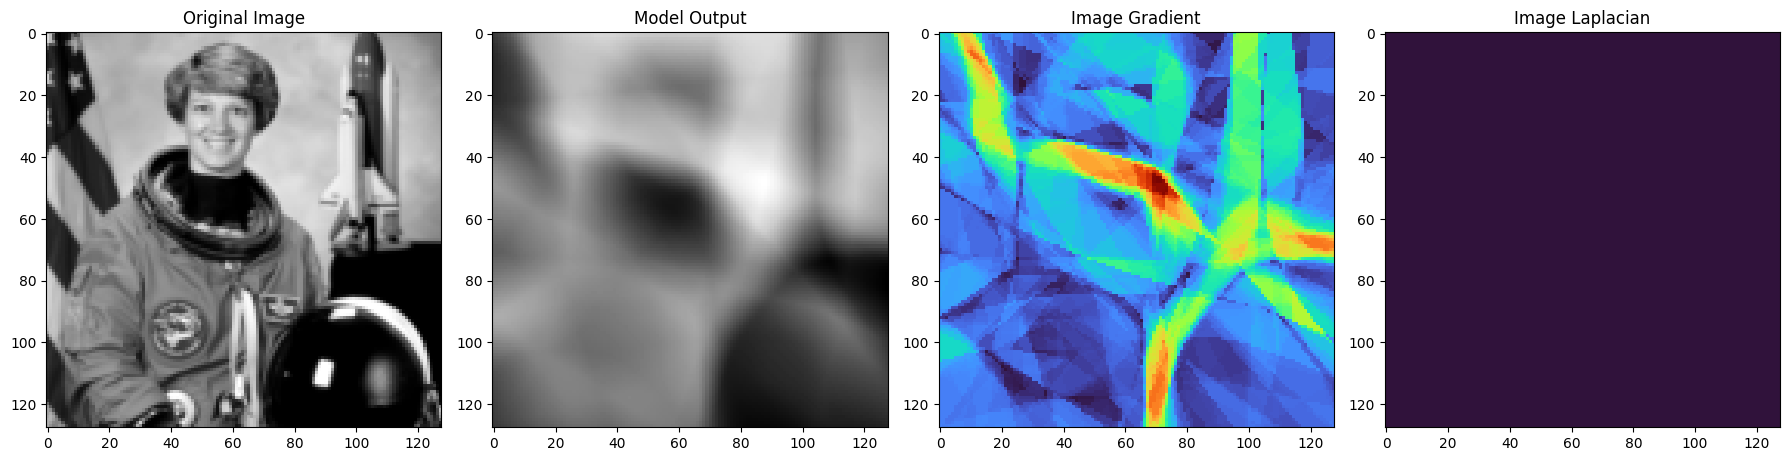

Step 1200 : loss=0.1074, psnr=9.6920


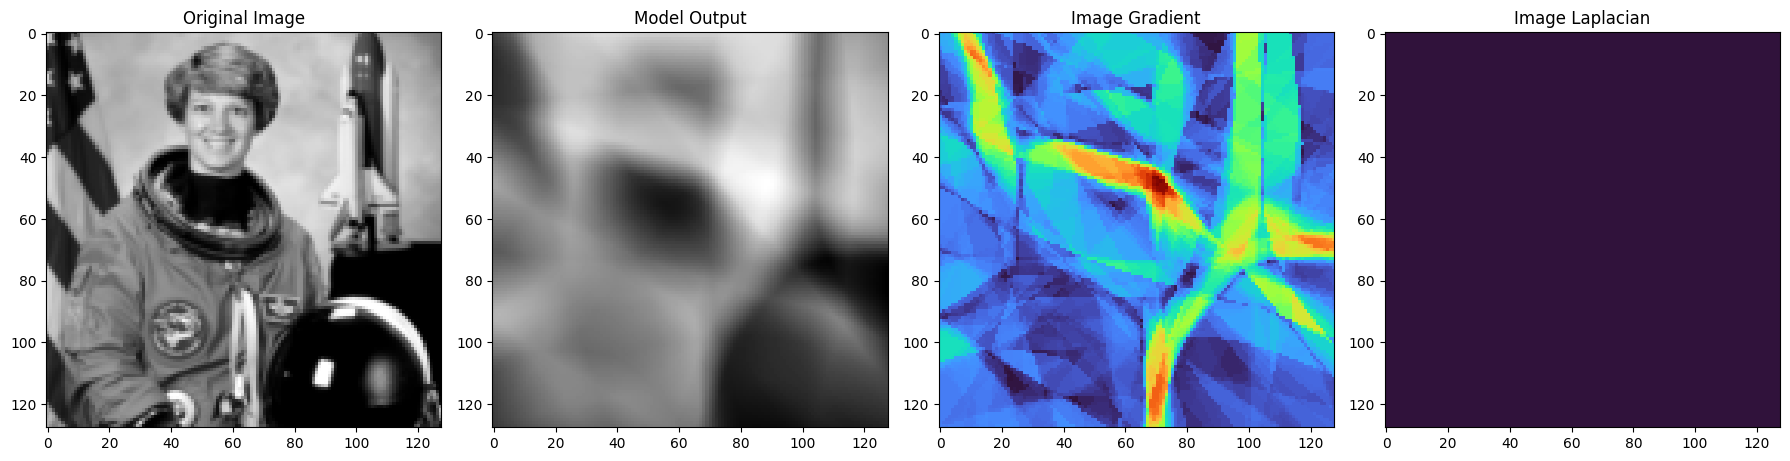

Step 1300 : loss=0.1028, psnr=9.8807


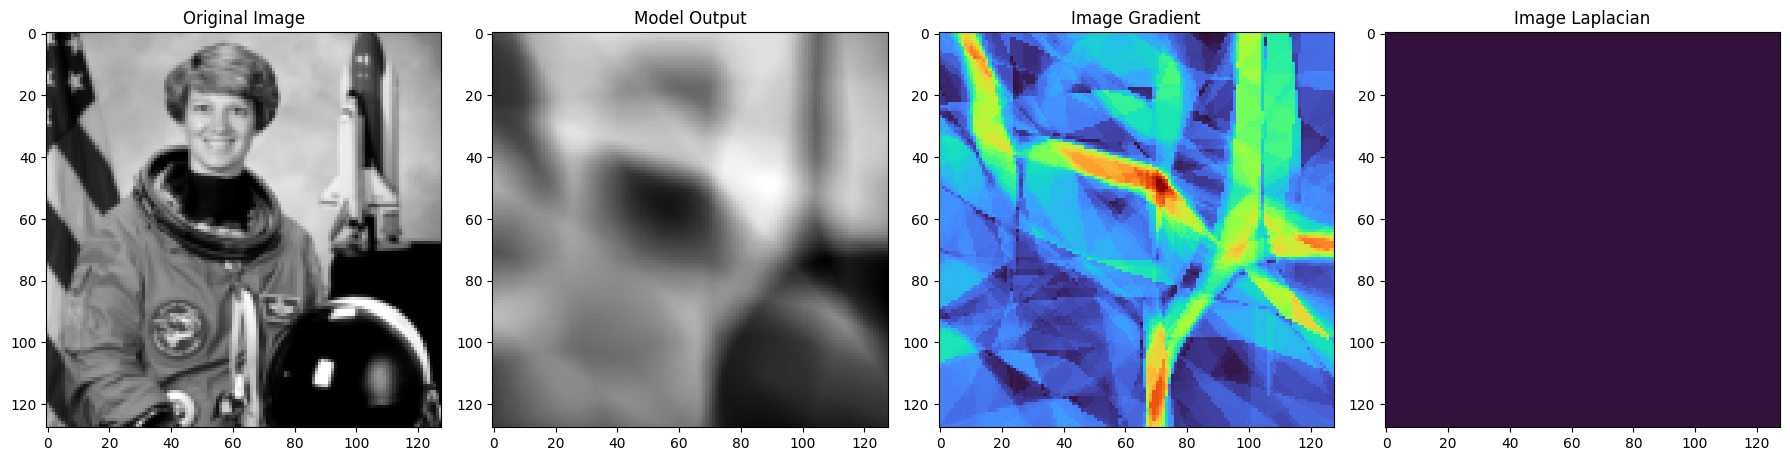

Step 1400 : loss=0.0988, psnr=10.0521


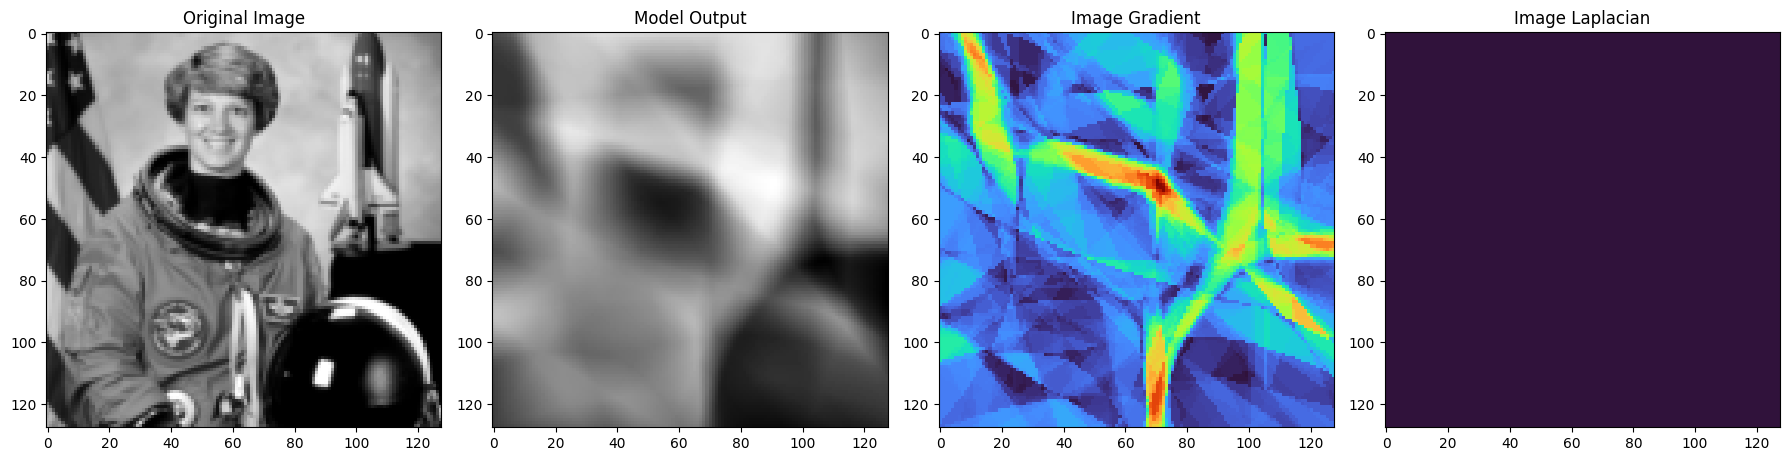

Step 1500 : loss=0.0951, psnr=10.2173


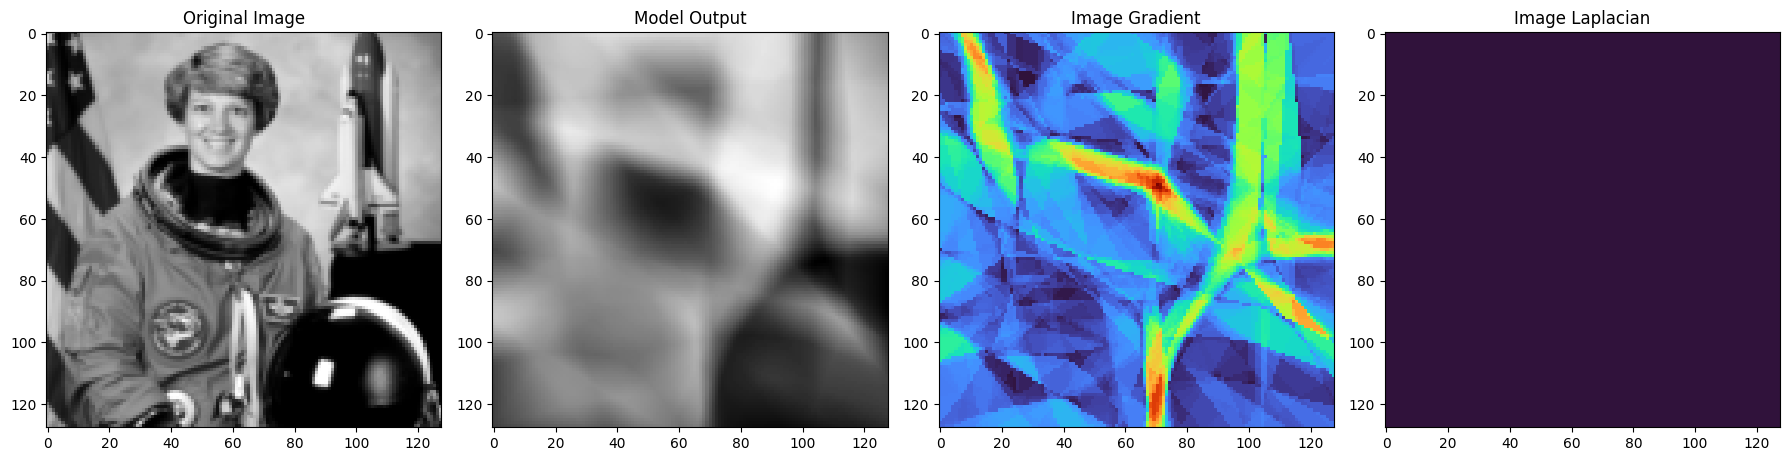

Step 1600 : loss=0.0918, psnr=10.3707


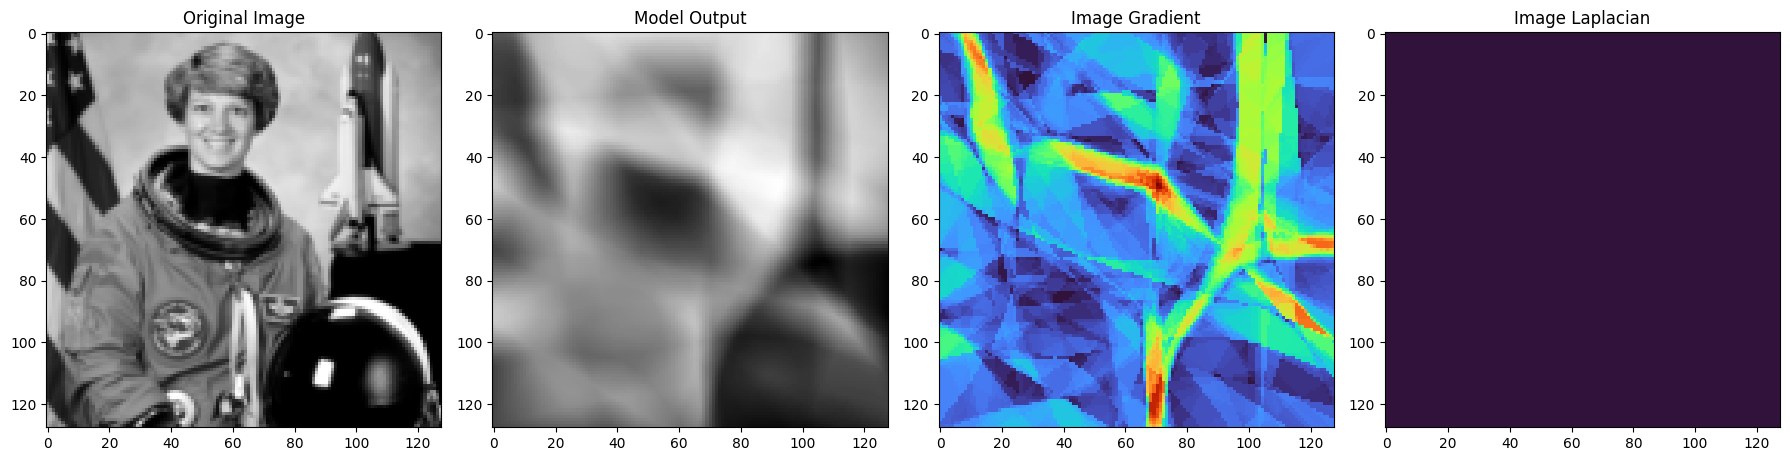

Step 1700 : loss=0.0889, psnr=10.5110


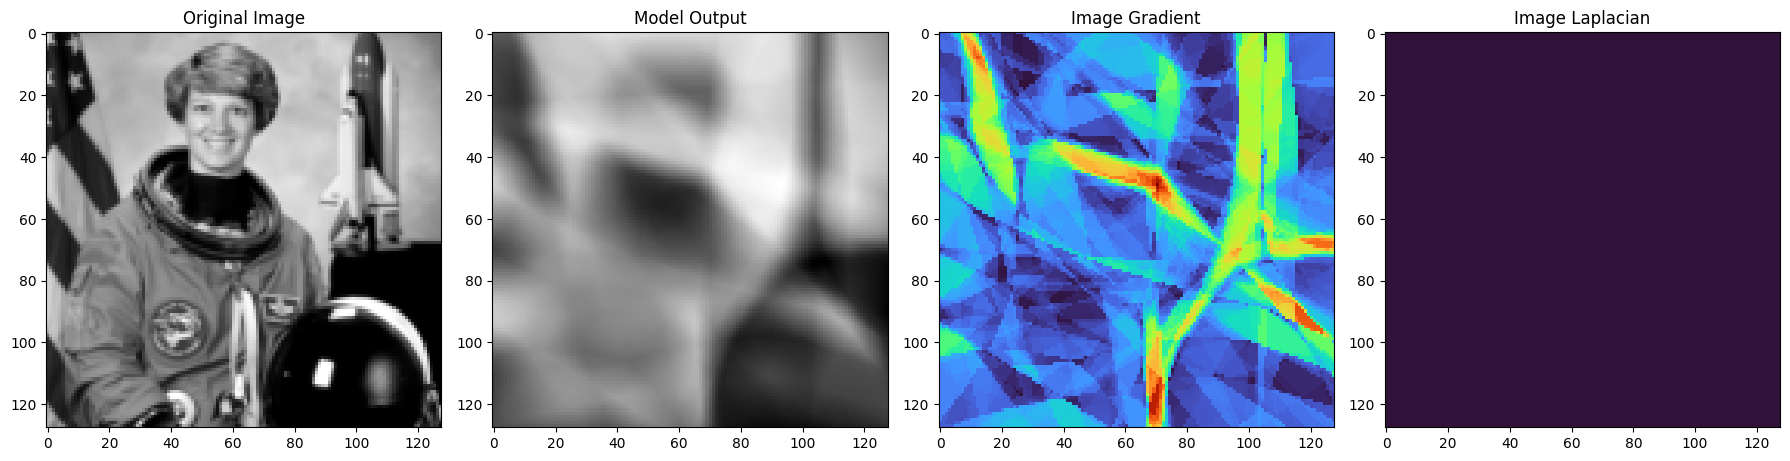

Step 1800 : loss=0.0863, psnr=10.6404


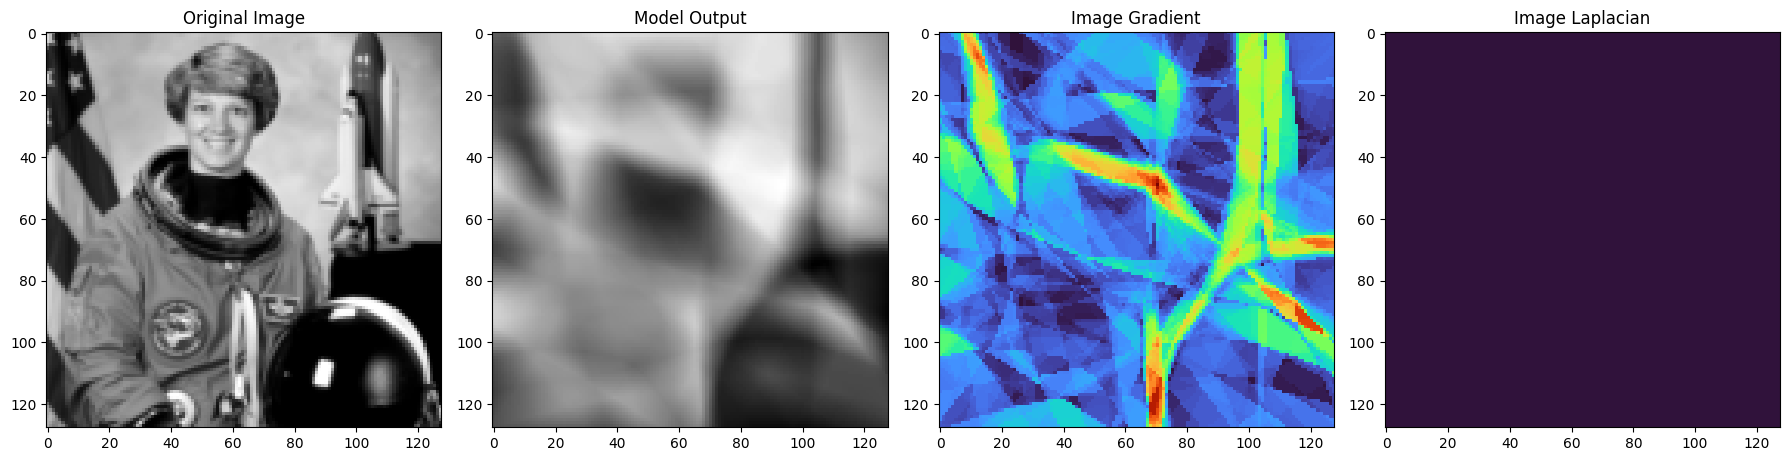

Step 1900 : loss=0.0839, psnr=10.7648


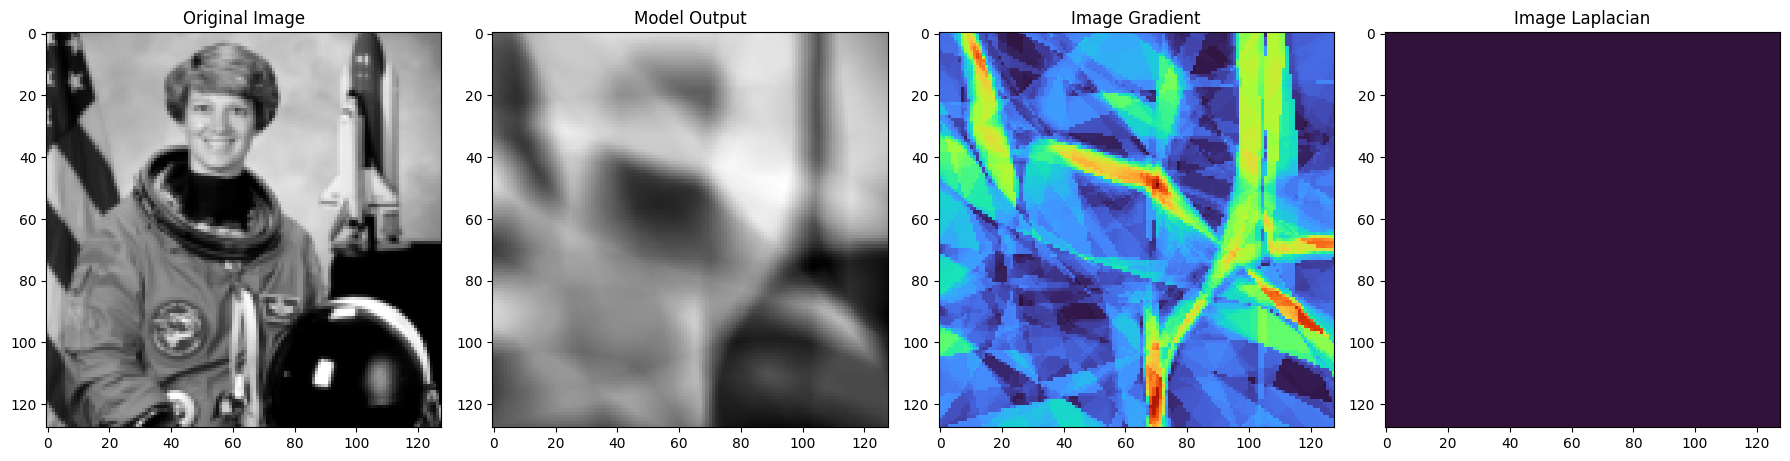

Step 2000 : loss=0.0816, psnr=10.8812


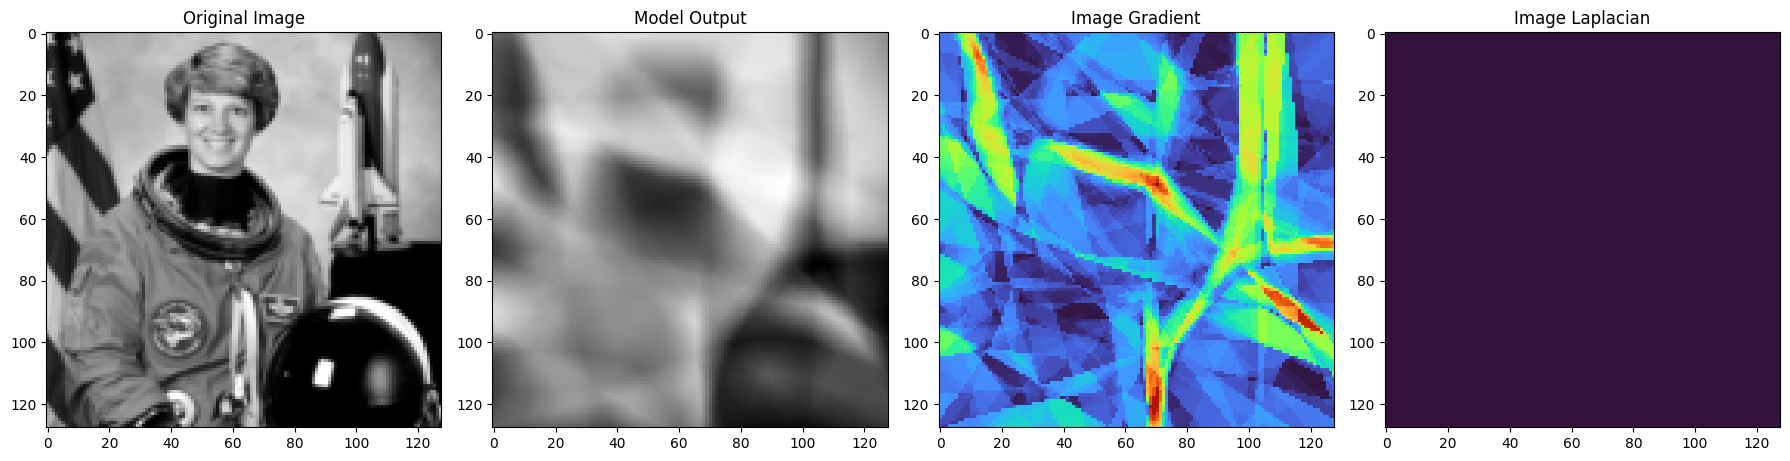

In [4]:
dataset = ImageDataset(height=128)

mlp_loss, mlp_psnr = train(
    model="MLP",
    dataset=dataset,
    lr=1e-4,
    total_steps=2000,
    steps_til_summary=100,
    device=device,
    **dict(
        in_features=2,
        out_features=1,
        hidden_features=128,
        hidden_layers=3,
        activation="ReLU",
    ),
)

Now fit the SIREN.

Step 0 : loss=0.5102, psnr=2.9229


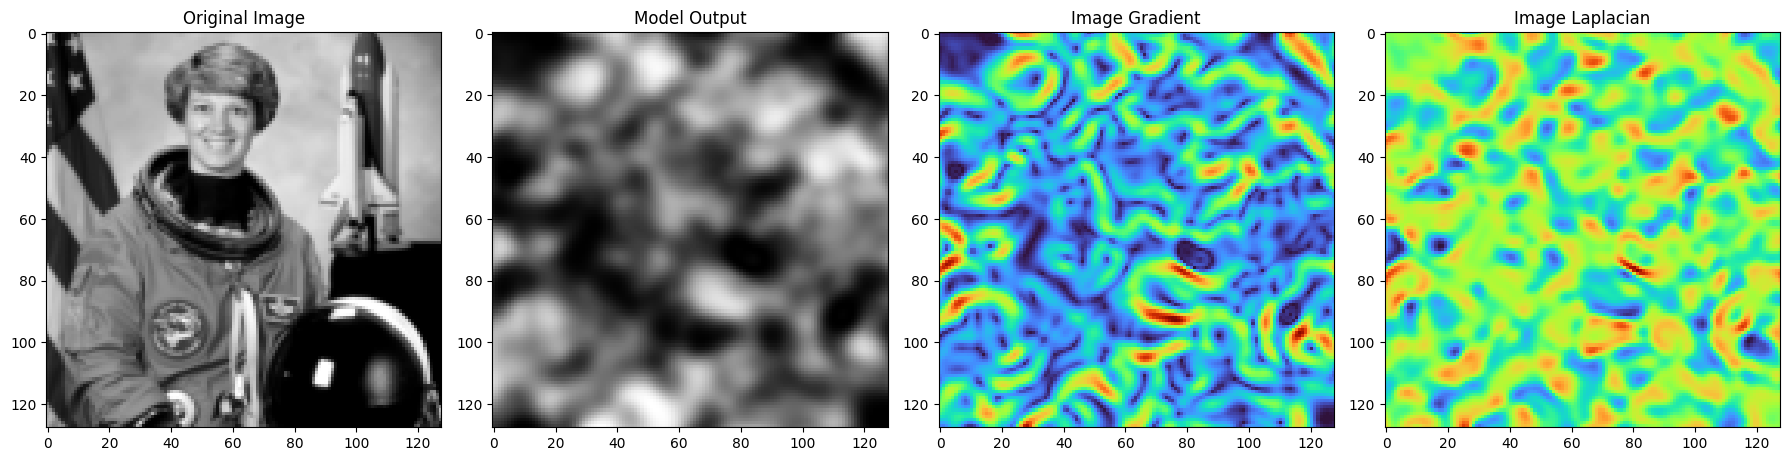

Step 25 : loss=0.0625, psnr=12.0440


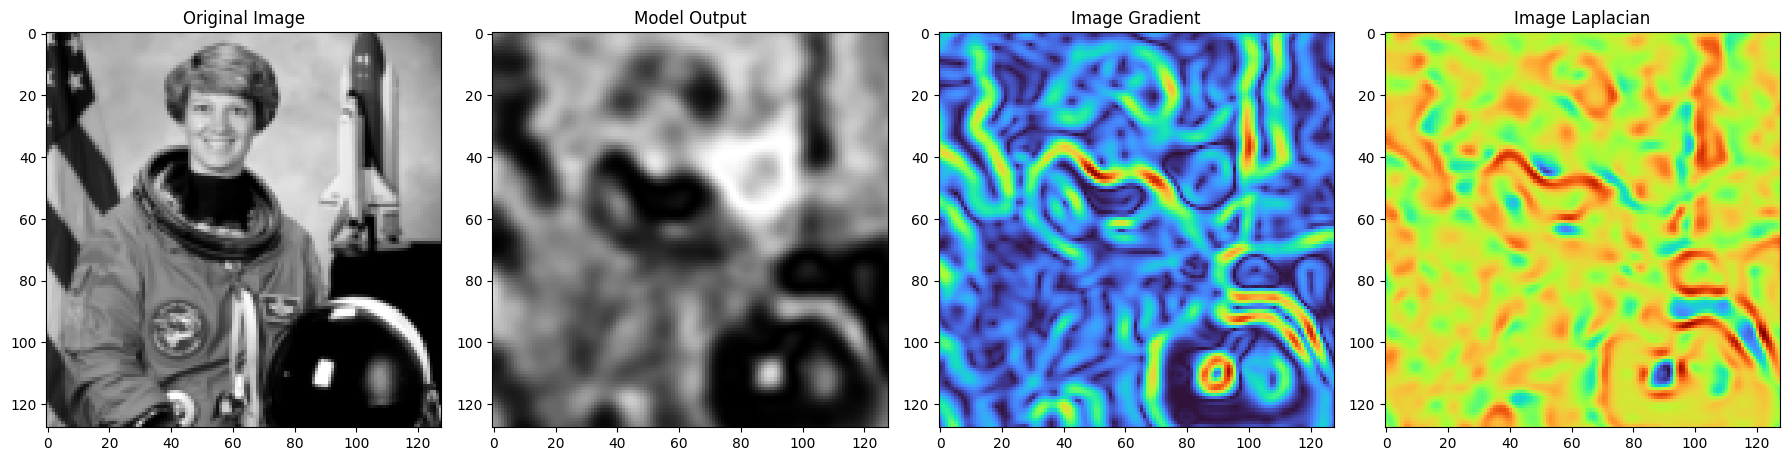

Step 50 : loss=0.0382, psnr=14.1783


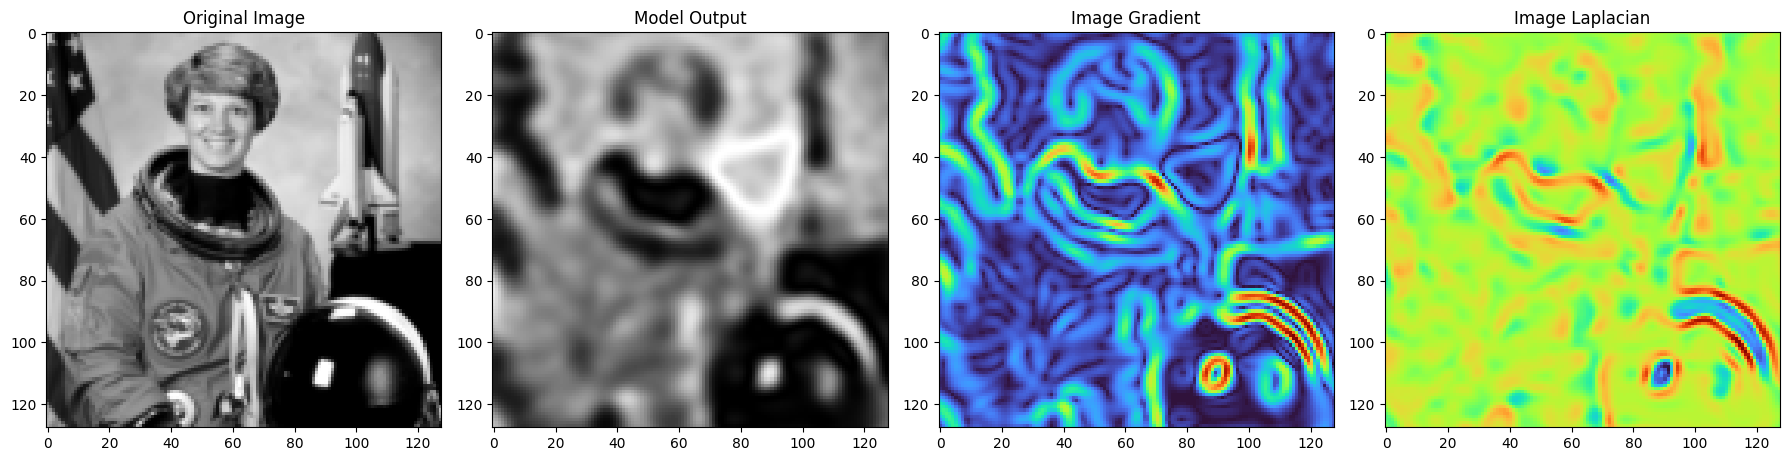

Step 75 : loss=0.0326, psnr=14.8637


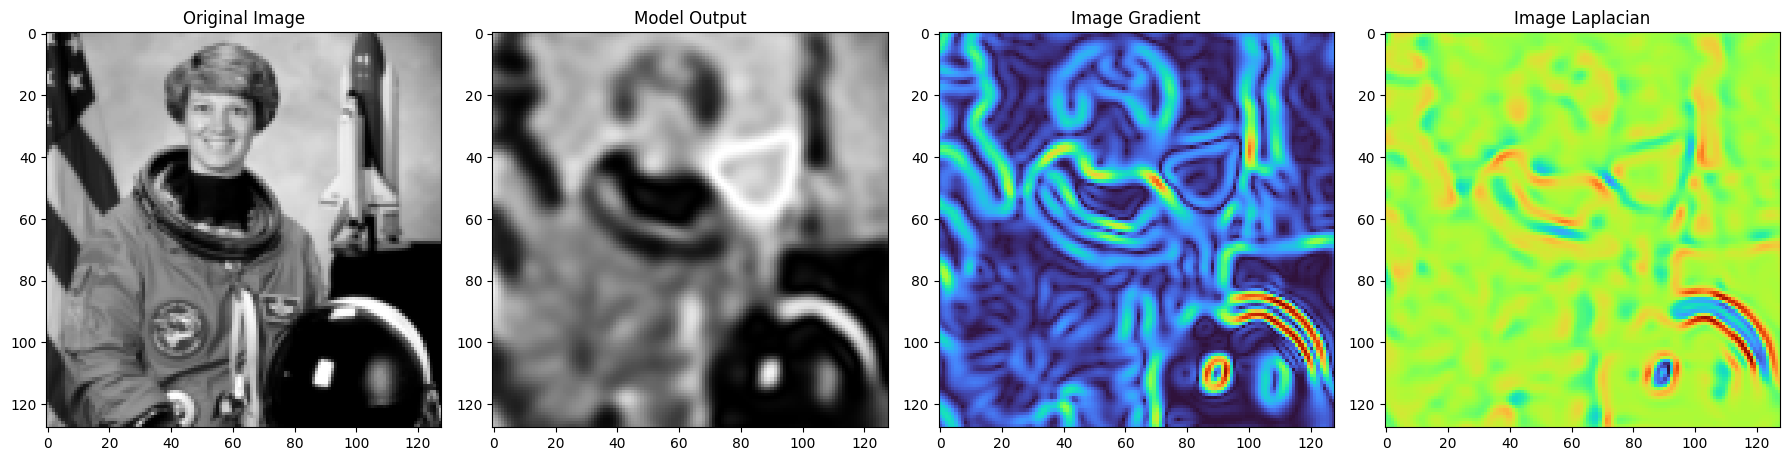

Step 100 : loss=0.0295, psnr=15.2979


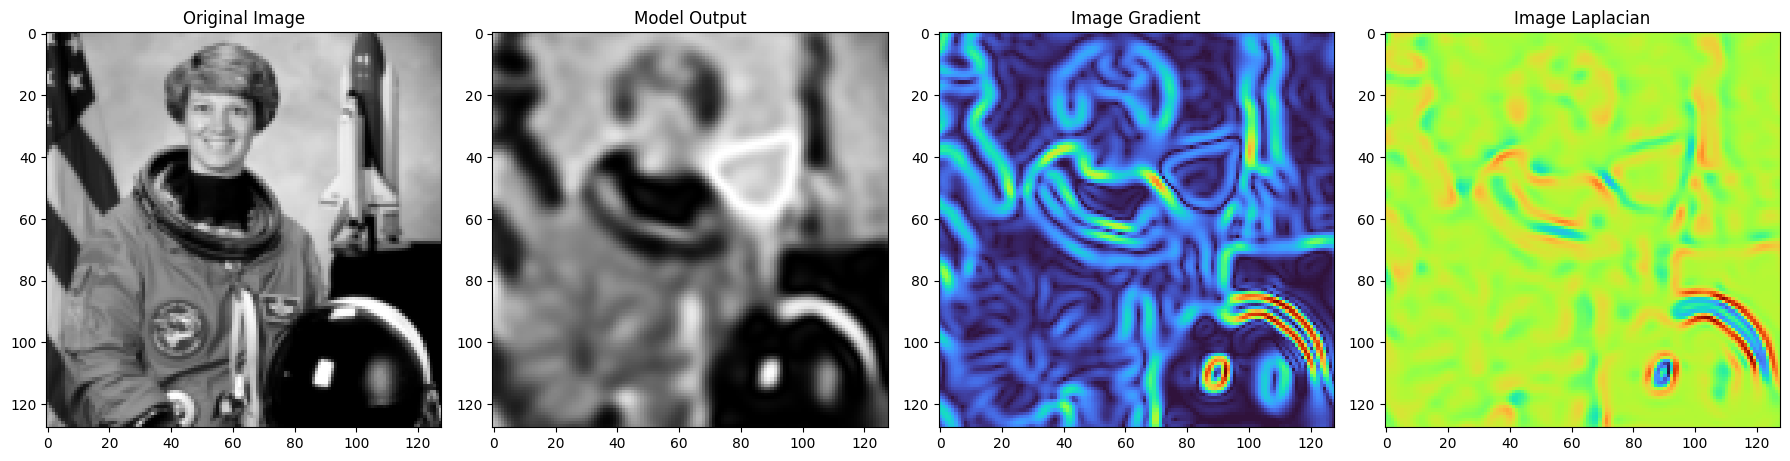

Step 125 : loss=0.0273, psnr=15.6437


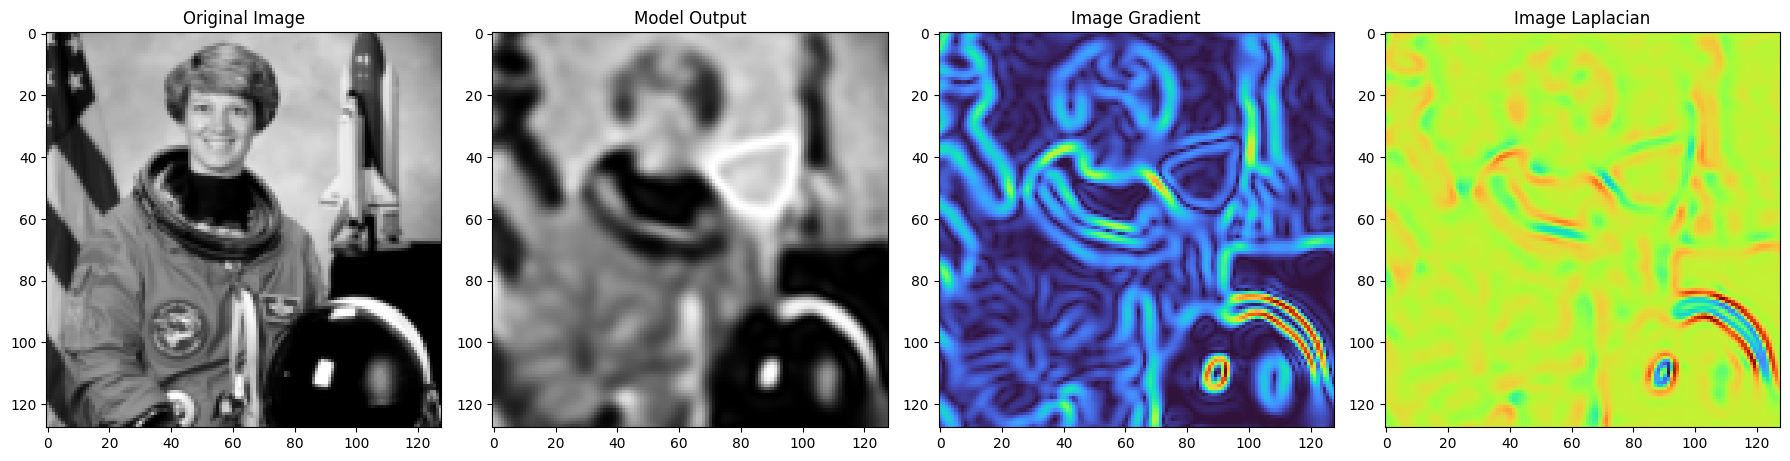

Step 150 : loss=0.0254, psnr=15.9522


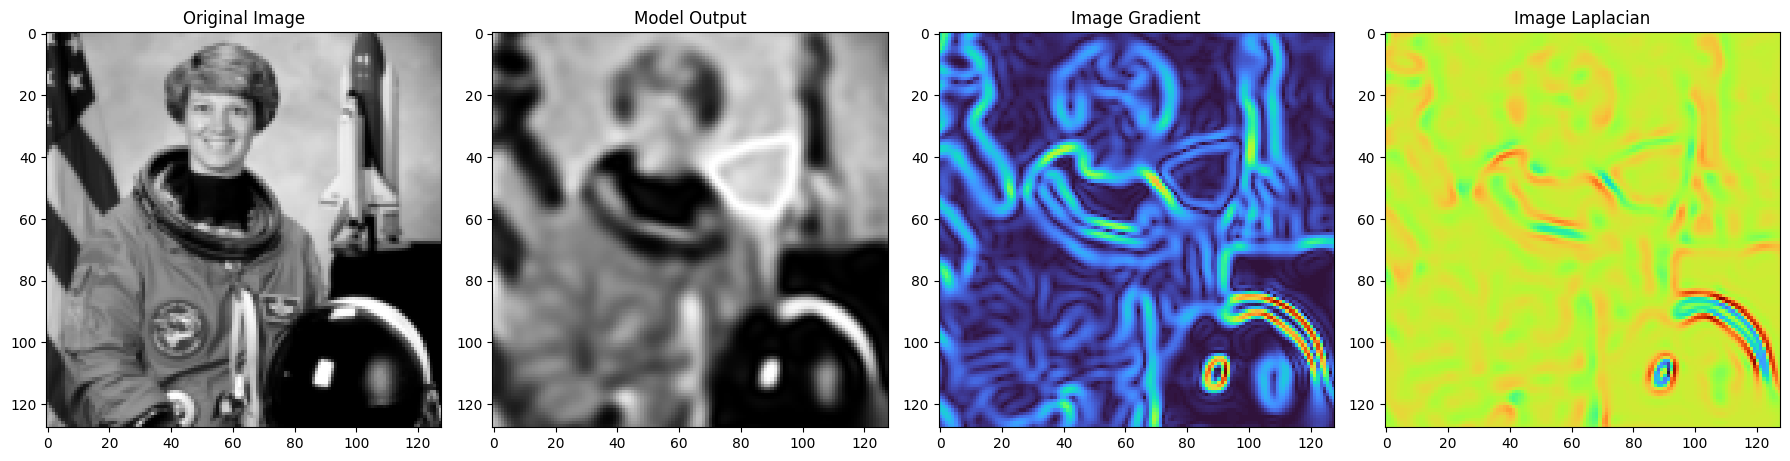

Step 175 : loss=0.0238, psnr=16.2423


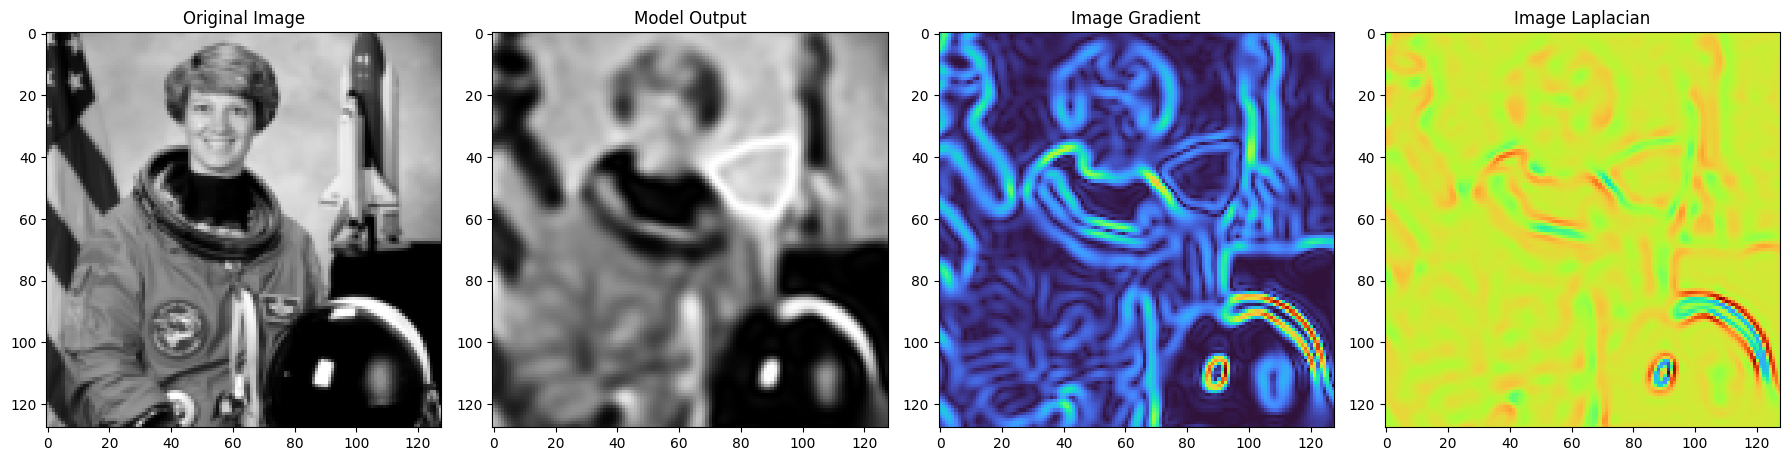

Step 200 : loss=0.0223, psnr=16.5222


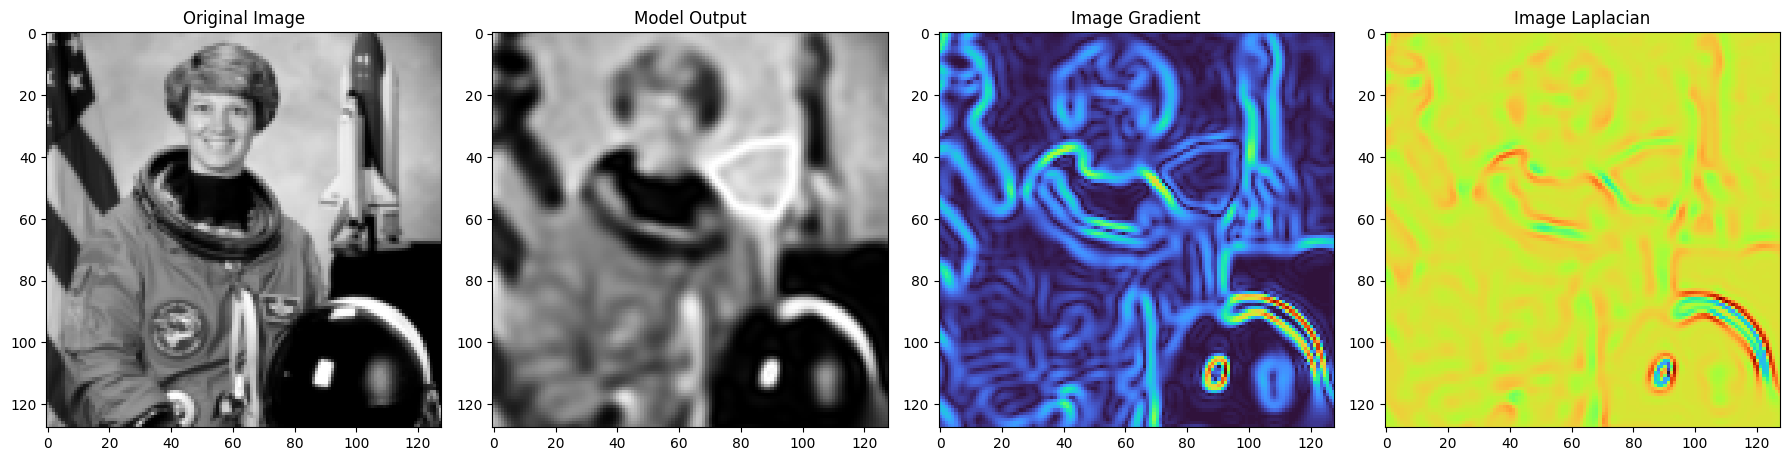

Step 225 : loss=0.0209, psnr=16.7955


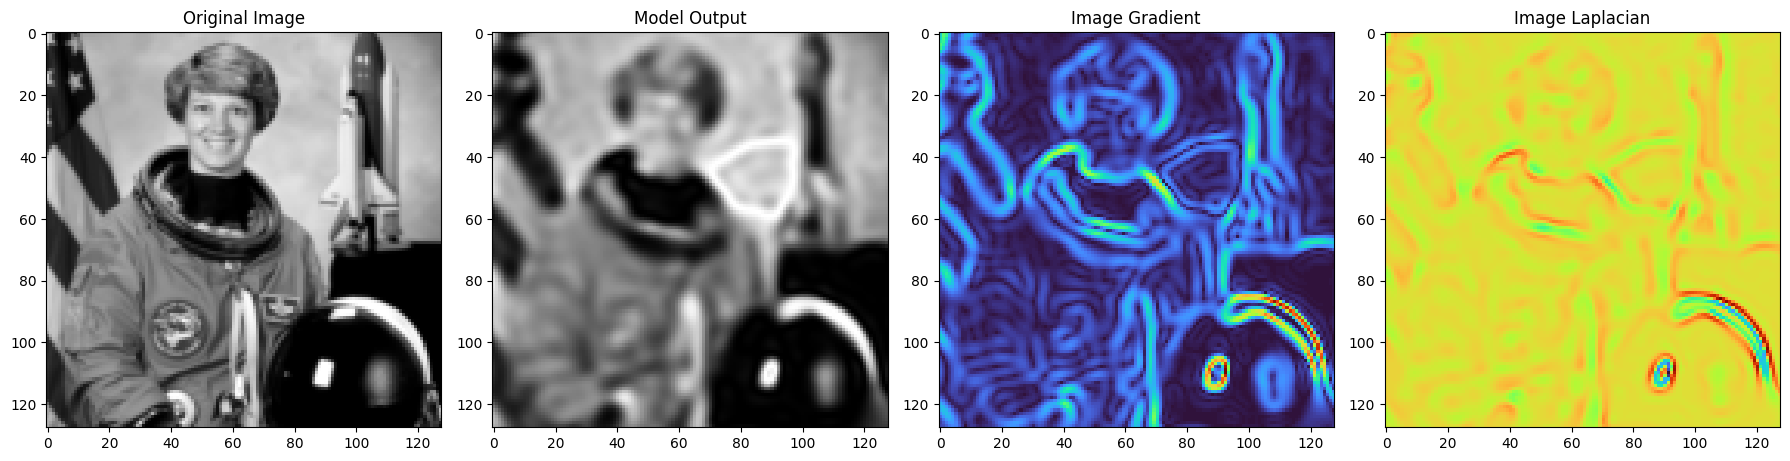

Step 250 : loss=0.0197, psnr=17.0643


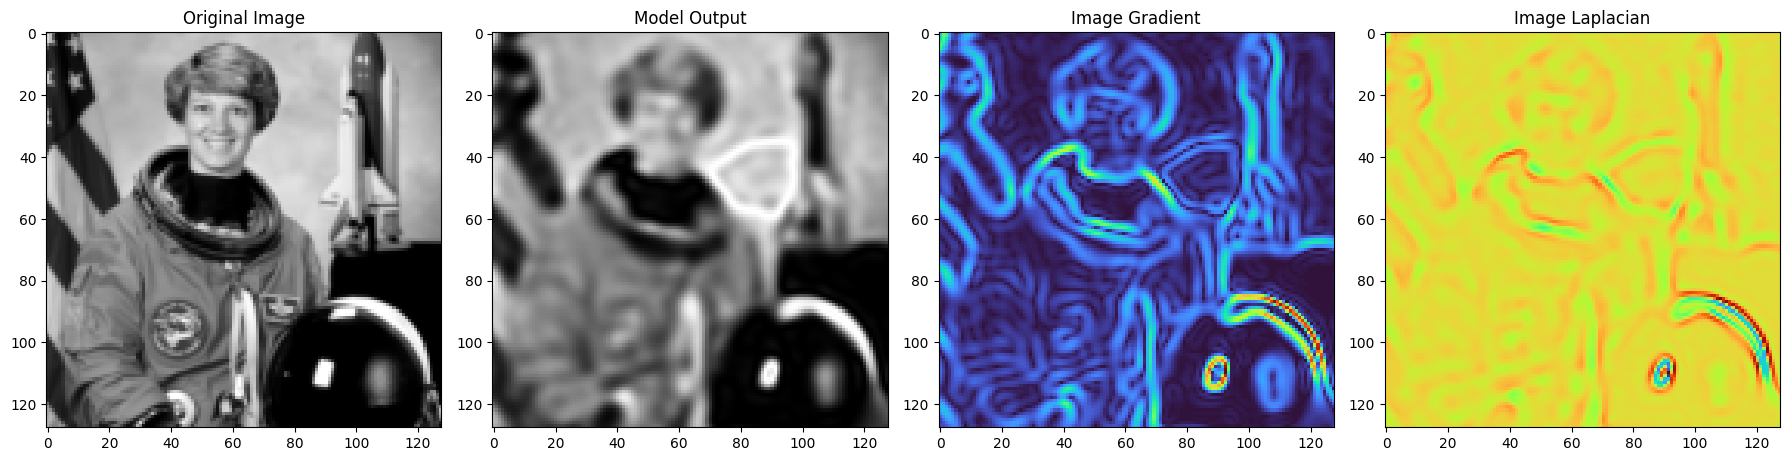

Step 275 : loss=0.0185, psnr=17.3285


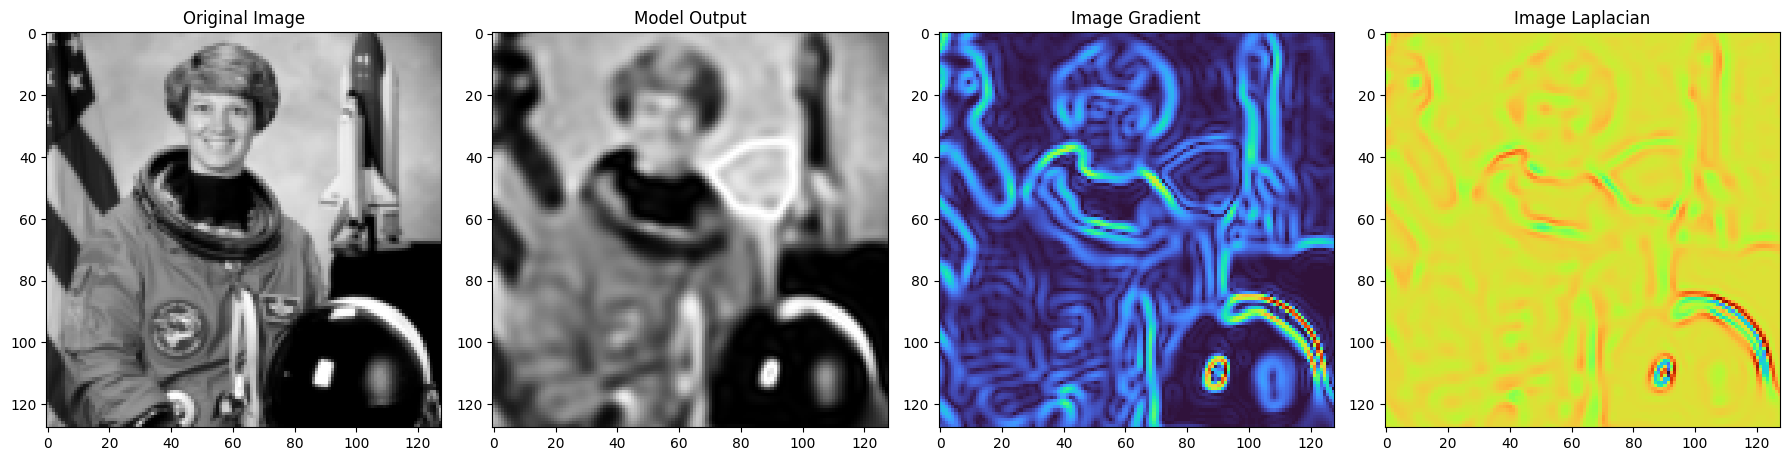

Step 300 : loss=0.0174, psnr=17.5859


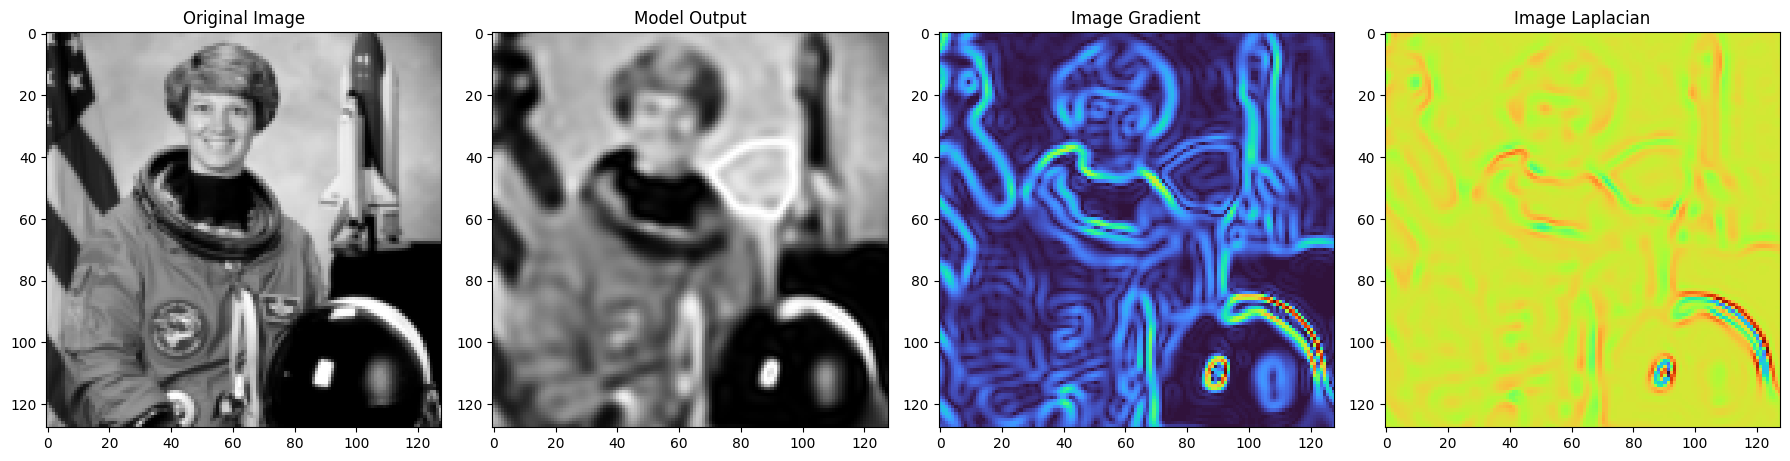

Step 325 : loss=0.0165, psnr=17.8343


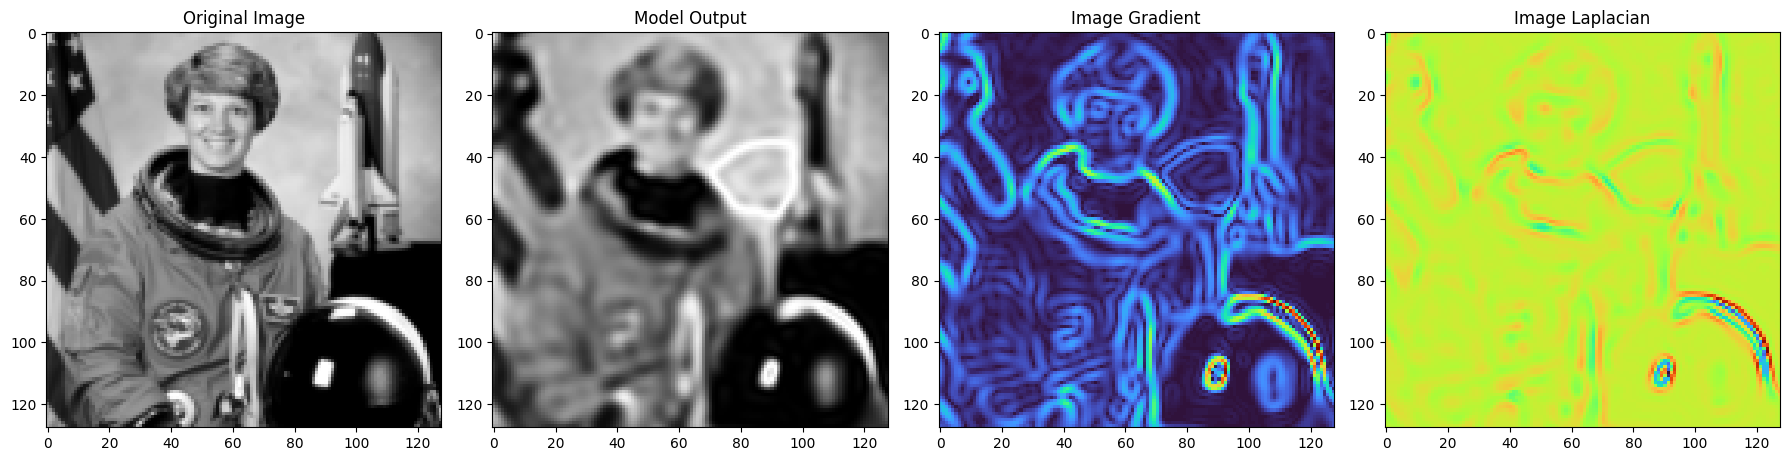

Step 350 : loss=0.0156, psnr=18.0732


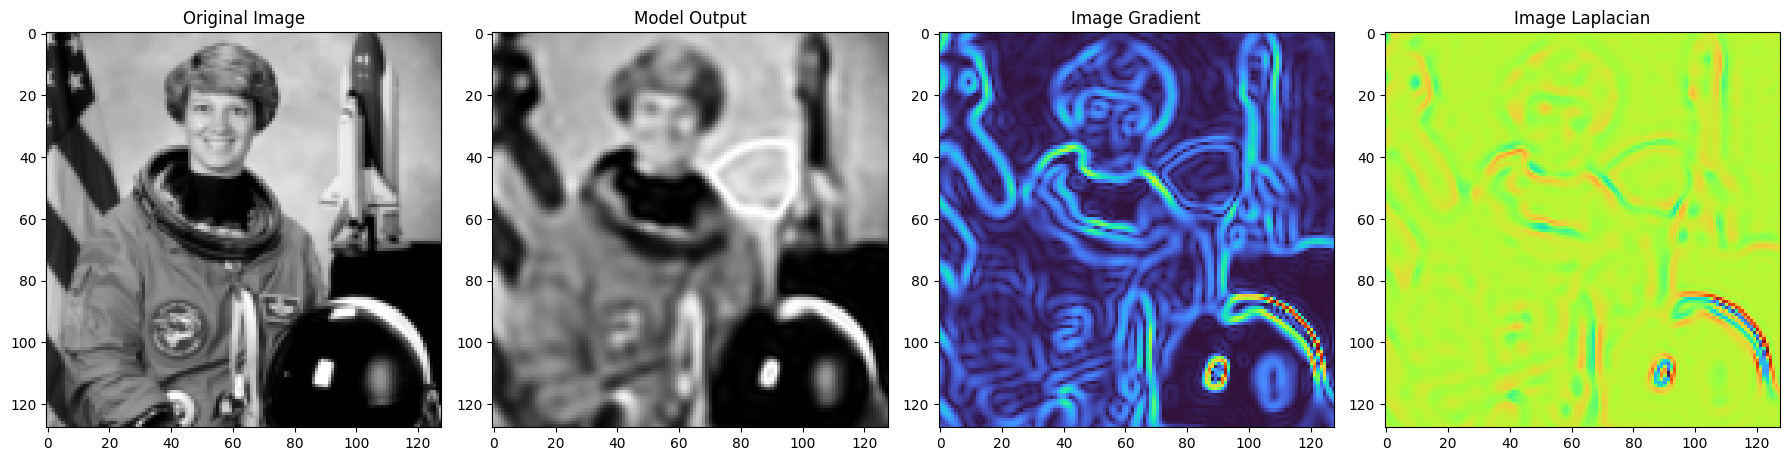

Step 375 : loss=0.0148, psnr=18.3042


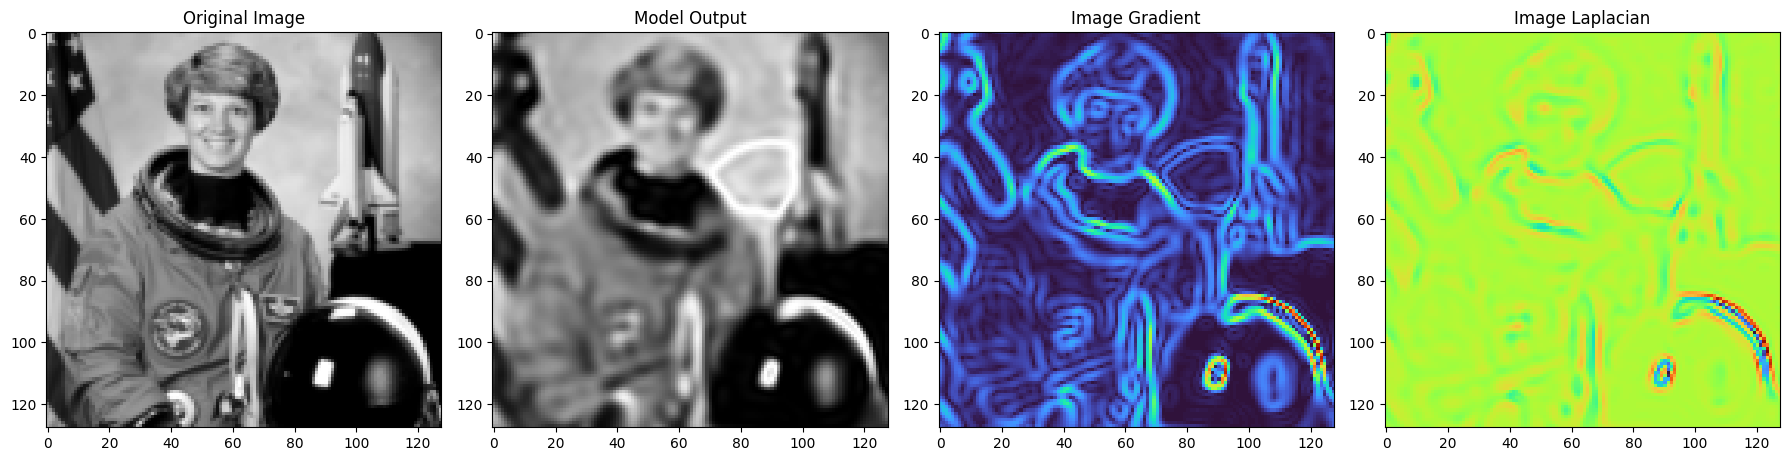

Step 400 : loss=0.0140, psnr=18.5294


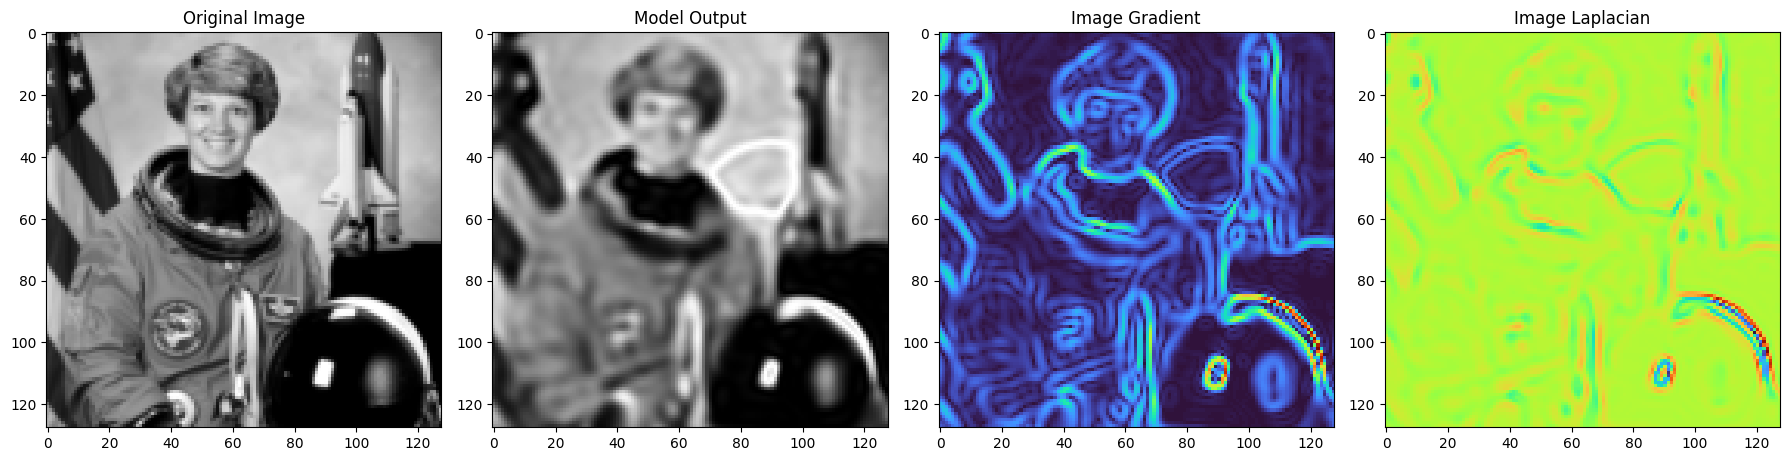

Step 425 : loss=0.0133, psnr=18.7504


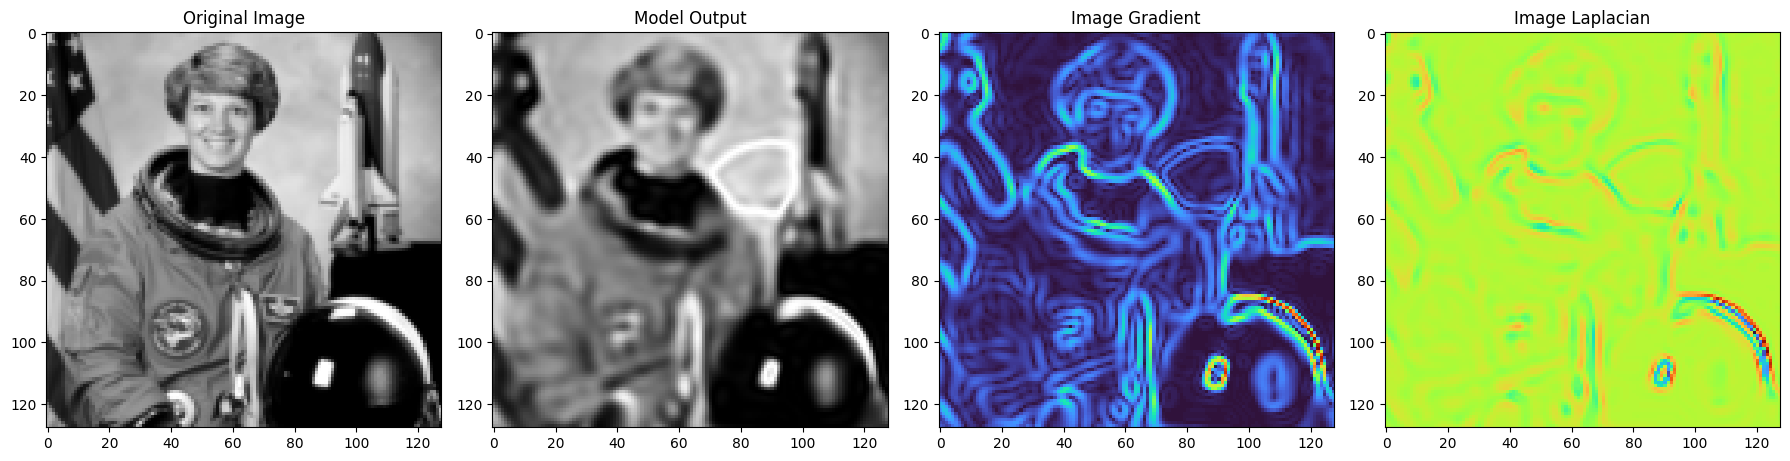

Step 450 : loss=0.0127, psnr=18.9680


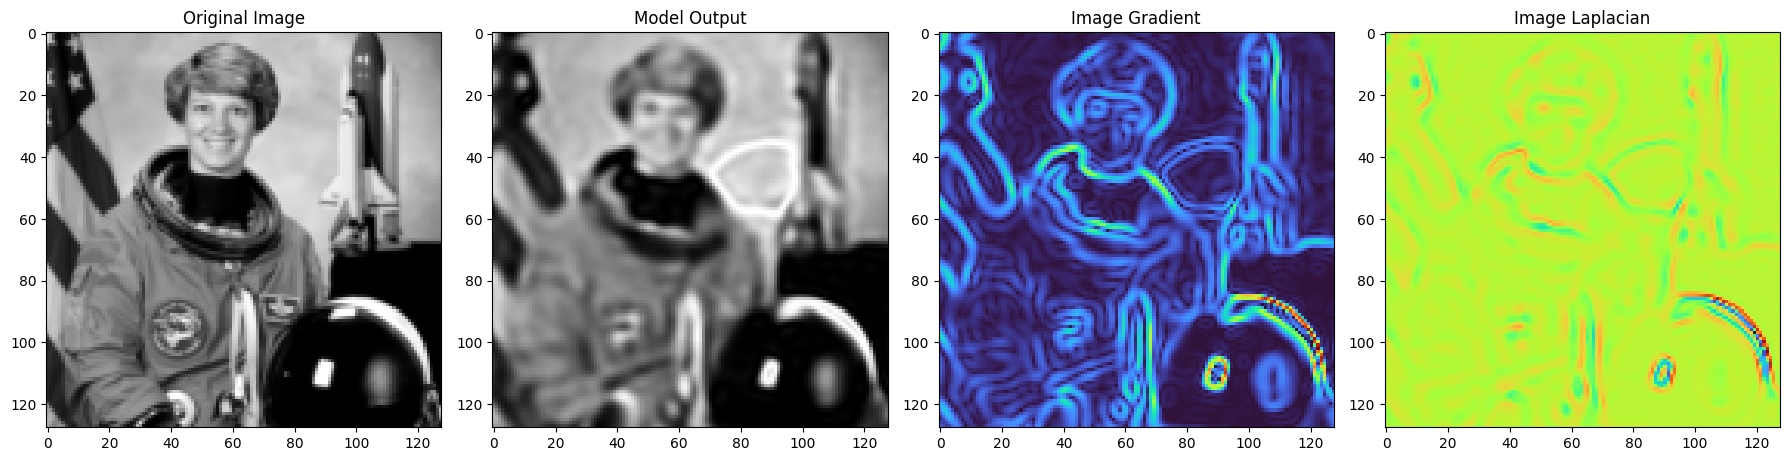

Step 475 : loss=0.0121, psnr=19.1825


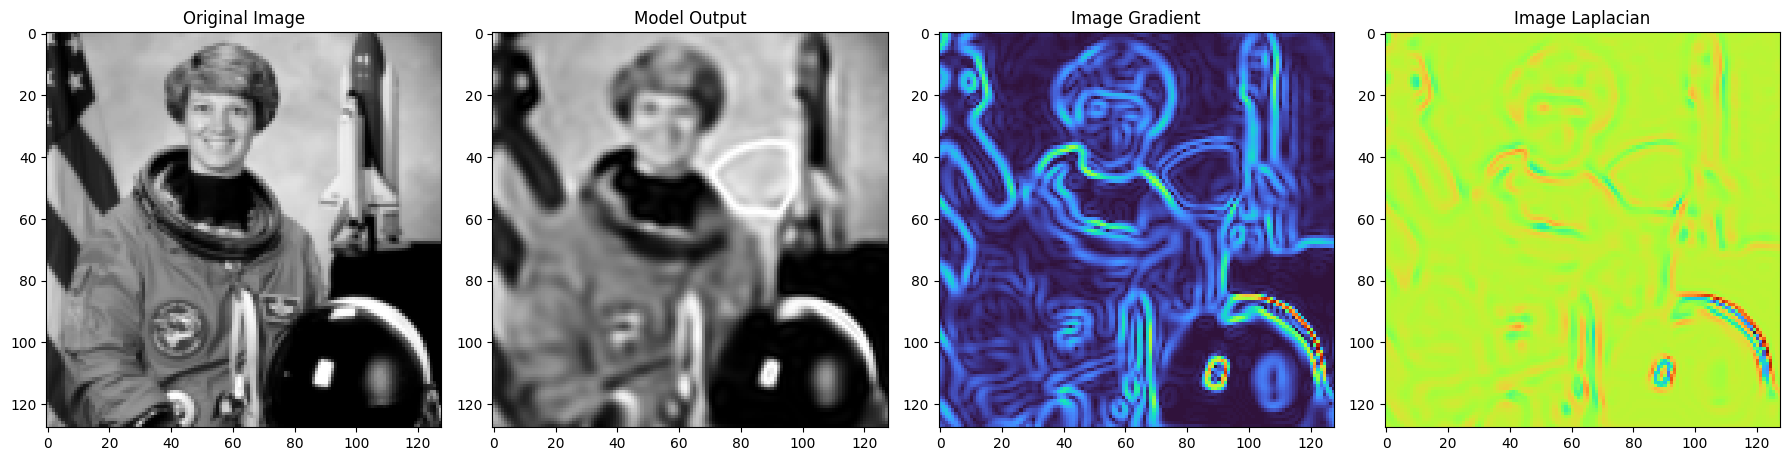

Step 500 : loss=0.0115, psnr=19.3947


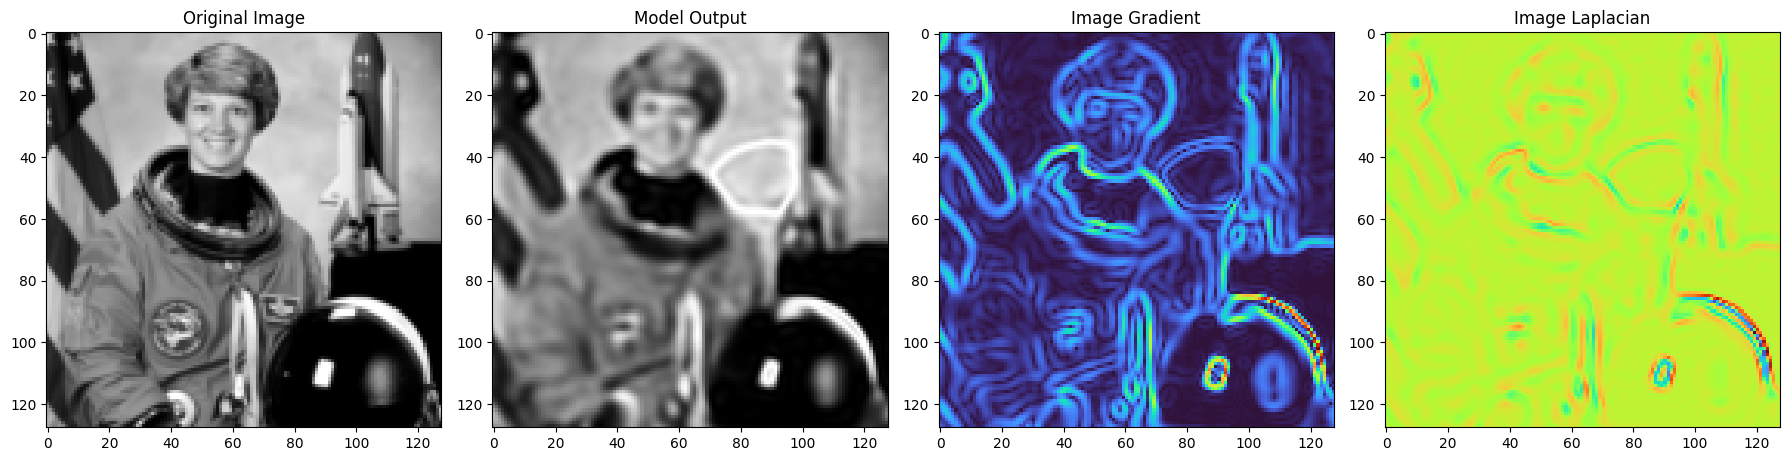

In [5]:
dataset = ImageDataset(height=128)

siren_loss, siren_psnr = train(
    model="SIREN",
    dataset=dataset,
    lr=1e-4,
    total_steps=500,
    steps_til_summary=25,
    device=device,
    **dict(
        in_features=2,
        out_features=1,
        hidden_features=128,
        hidden_layers=3,
    ),
)

Compare the loss and PSNR for the two models.

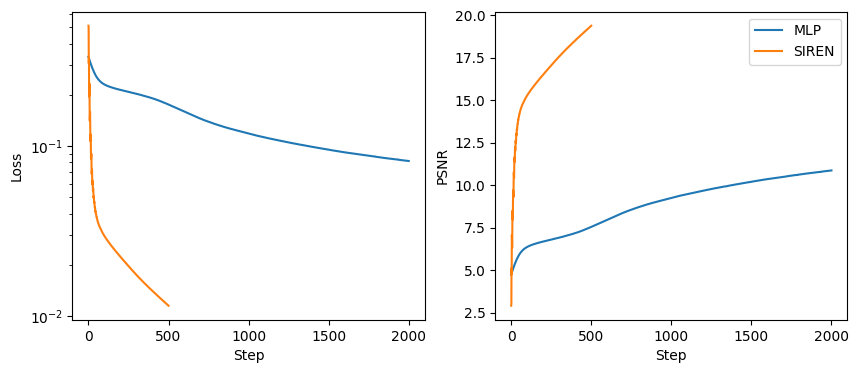

In [6]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(mlp_loss, label="MLP")
plt.plot(siren_loss, label="SIREN")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.yscale("log")
plt.subplot(122)
plt.plot(mlp_psnr, label="MLP")
plt.plot(siren_psnr, label="SIREN")
plt.xlabel("Step")
plt.ylabel("PSNR")
plt.legend()
plt.show()